#### Data

In [1]:
r0 = 'Without prejudice to the power of the Board under the Act, the code of conduct shall stipulate the sanctions and disciplinary actions, including wage freeze, suspension etc., that may be imposed, by the persons required to formulate a code of conduct under sub-regulation (1) and sub-regulation (2) of regulation 9, for the contravention of the code of conduct.'
r1 = 'Without prejudice to the power of the Board under the Act, the code of conduct shall stipulate the sanctions and disciplinary actions, including wage freeze, suspension, recovery, etc., that may be imposed, by the listed company required to formulate a code of conduct under subregulation (1) of regulation 9, for the contravention of the code of conduct. Any amount collected under this clause shall be remitted to the Board for credit to the Investor Protection and Education Fund administered by the Board under the Act.'

In [2]:
r0

'Without prejudice to the power of the Board under the Act, the code of conduct shall stipulate the sanctions and disciplinary actions, including wage freeze, suspension etc., that may be imposed, by the persons required to formulate a code of conduct under sub-regulation (1) and sub-regulation (2) of regulation 9, for the contravention of the code of conduct.'

In [3]:
source0 = ['code of conduct','code of conduct','sanctions','disciplinary actions','sanctions','disciplinary actions','wage freeze','suspension','persons','code of conduct','code of conduct','sub-regulation (1)','sub-regulation (2)','regulation 9','contravention']
target0 = ['sanctions','disciplinary actions','wage freeze','wage freeze', 'suspension', 'suspension','persons','persons','code of conduct','sub-regulation (1)','sub-regulation (2)','regulation 9','regulation 9','contravention','code of conduct']

In [4]:
label0 = ['shall stipulate','shall stipulate', 'including','including','including','including','that may be imposed by','that may be imposed by','required to formulate','under','under','of','of','for','of']

In [5]:
print(len(label0))

15


In [6]:
print(len(source0))
print(len(target0))

15
15


In [7]:
r1

'Without prejudice to the power of the Board under the Act, the code of conduct shall stipulate the sanctions and disciplinary actions, including wage freeze, suspension, recovery, etc., that may be imposed, by the listed company required to formulate a code of conduct under subregulation (1) of regulation 9, for the contravention of the code of conduct. Any amount collected under this clause shall be remitted to the Board for credit to the Investor Protection and Education Fund administered by the Board under the Act.'

In [8]:
source1 = ['code of conduct','code of conduct','sanctions','disciplinary actions','sanctions','disciplinary actions','sanctions','disciplinary actions','wage freeze','suspension','recovery','listed company','code of conduct','sub-regulation (1)','regulation 9','contravention','code of conduct','amount','clause','Board','credit','Investor Protection and Education Fund','Board']
target1 = ['sanctions','disciplinary actions','wage freeze','wage freeze', 'suspension', 'suspension','recovery','recovery','listed company','listed company','listed company','code of conduct','sub-regulation (1)','regulation 9','contravention','code of conduct','amount','clause','Board','credit','Investor Protection and Education Fund','Board','Act']

In [9]:
label1 = ['shall stipulate','shall stipulate','including','including','including','including','including','including','that may be imposed by','that may be imposed by','that may be imposed by','required to formulate','under','of','for','of','Any','collected under this','shall be remitted to','for','to','administered by','under']

In [10]:
print(len(source1))
print(len(target1))

23
23


In [11]:
print(len(label1))

23


## Graphical Analysis

#### Largest common subgraphs

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
df0 = pd.DataFrame({
        'source': source0,
        'target': target0,
     })
#df0

In [13]:
df1 = pd.DataFrame({
        'source': source1,
        'target': target1,
     })
#df1

In [14]:
G0=nx.from_pandas_edgelist(df0, 
                         create_using=nx.Graph())
G1=nx.from_pandas_edgelist(df1, 
                         create_using=nx.Graph())

In [15]:
ismags = nx.isomorphism.ISMAGS(G0,G1)

In [17]:
ismags.is_isomorphic()

False

In [18]:
largest_common_subgraph = list(ismags.largest_common_subgraph())

In [20]:
len(largest_common_subgraph)

48

In [19]:
G0nodes = list(largest_common_subgraph[0].keys())
G1nodes = list(largest_common_subgraph[0].values())

In [22]:
val_map0 = {}
for i in G0nodes:
    val_map0[i] = 1.0
val_map0

{'sanctions': 1.0,
 'disciplinary actions': 1.0,
 'sub-regulation (2)': 1.0,
 'suspension': 1.0,
 'regulation 9': 1.0,
 'sub-regulation (1)': 1.0,
 'persons': 1.0,
 'contravention': 1.0,
 'wage freeze': 1.0}

In [23]:
val_map1 = {}
for i in G1nodes:
    val_map1[i] = 1.0
val_map1

{'sanctions': 1.0,
 'disciplinary actions': 1.0,
 'Investor Protection and Education Fund': 1.0,
 'code of conduct': 1.0,
 'Board': 1.0,
 'clause': 1.0,
 'listed company': 1.0,
 'Act': 1.0,
 'recovery': 1.0}

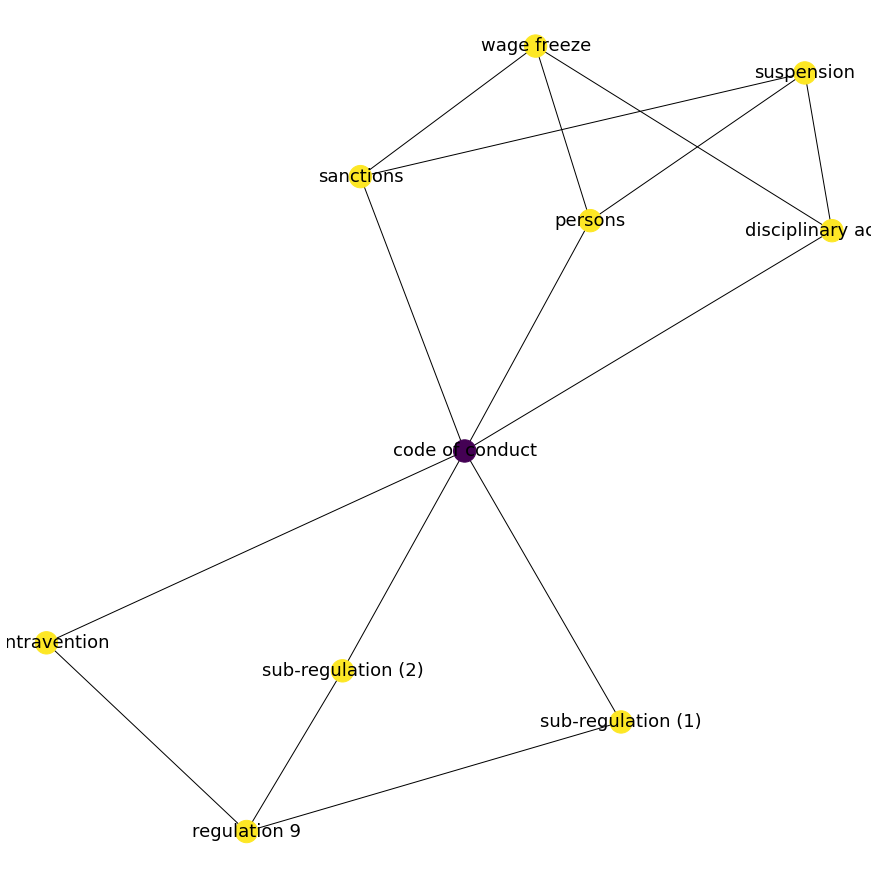

In [24]:
values = [val_map0.get(node, 0.25) for node in G0.nodes()]

plt.figure(figsize=(12,12))
    
pos = nx.spring_layout(G0)
nx.draw(G0, with_labels=True, node_color=values, edge_cmap=plt.cm.Blues, pos = pos, node_size = 500, font_size = 18)
plt.show()

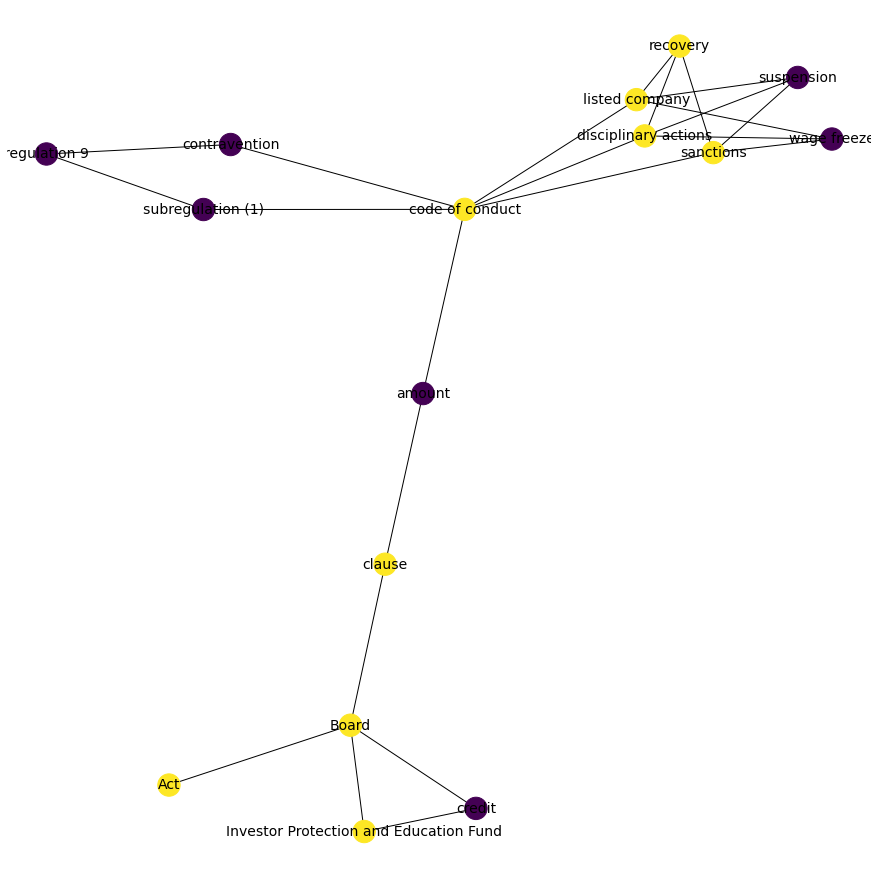

In [28]:
values = [val_map1.get(node, 0.25) for node in G1.nodes()]

plt.figure(figsize=(12,12))
    
pos = nx.spring_layout(G1)
nx.draw(G1, with_labels=True, node_color=values, edge_cmap=plt.cm.Blues, pos = pos, node_size = 500, font_size = 14)
plt.show()

#### Modified subgraphs extraction

In [13]:
val_map0 = {}
for i in source0:
    if(i not in source1):
        val_map0[i] = 1.0
#val_map0

In [14]:
val_map1 = {}
for i in source1:
    if(i not in source0):
        val_map1[i] = 1.0

In [15]:
set0 = []
t=0
while(t<len(source0)):
    set0.append((source0[t],target0[t]))
    t+=1

In [16]:
set1 = []
t=0
while(t<len(source1)):
    set1.append((source1[t],target1[t]))
    t+=1

In [17]:
edge_val0 = {}
t=0
for i in set0:
    if(i not in set1):
        edge_val0[i] = 1.0
    t=t+1

In [18]:
edge_val1 = {}
t=0
for i in set1:
    if(i not in set0):
        edge_val1[i] = 1.0
    t=t+1

In [19]:
df0 = pd.DataFrame({
        'source': source0,
        'target': target0,
        'label' : label0
     })
#df0

In [20]:
df1 = pd.DataFrame({
        'source': source1,
        'target': target1,
        'label' : label1
     })

In [21]:
e_label0 = {}
t=0
for i in set0:
    e_label0[i] = label0[t]
    t=t+1

In [22]:
e_label1 = {}
t=0
for i in set1:
    e_label1[i] = label1[t]
    t=t+1

In [23]:
Ge0=nx.from_pandas_edgelist(df0, 
                         create_using=nx.MultiDiGraph())
Ge1=nx.from_pandas_edgelist(df1, 
                         create_using=nx.MultiDiGraph())

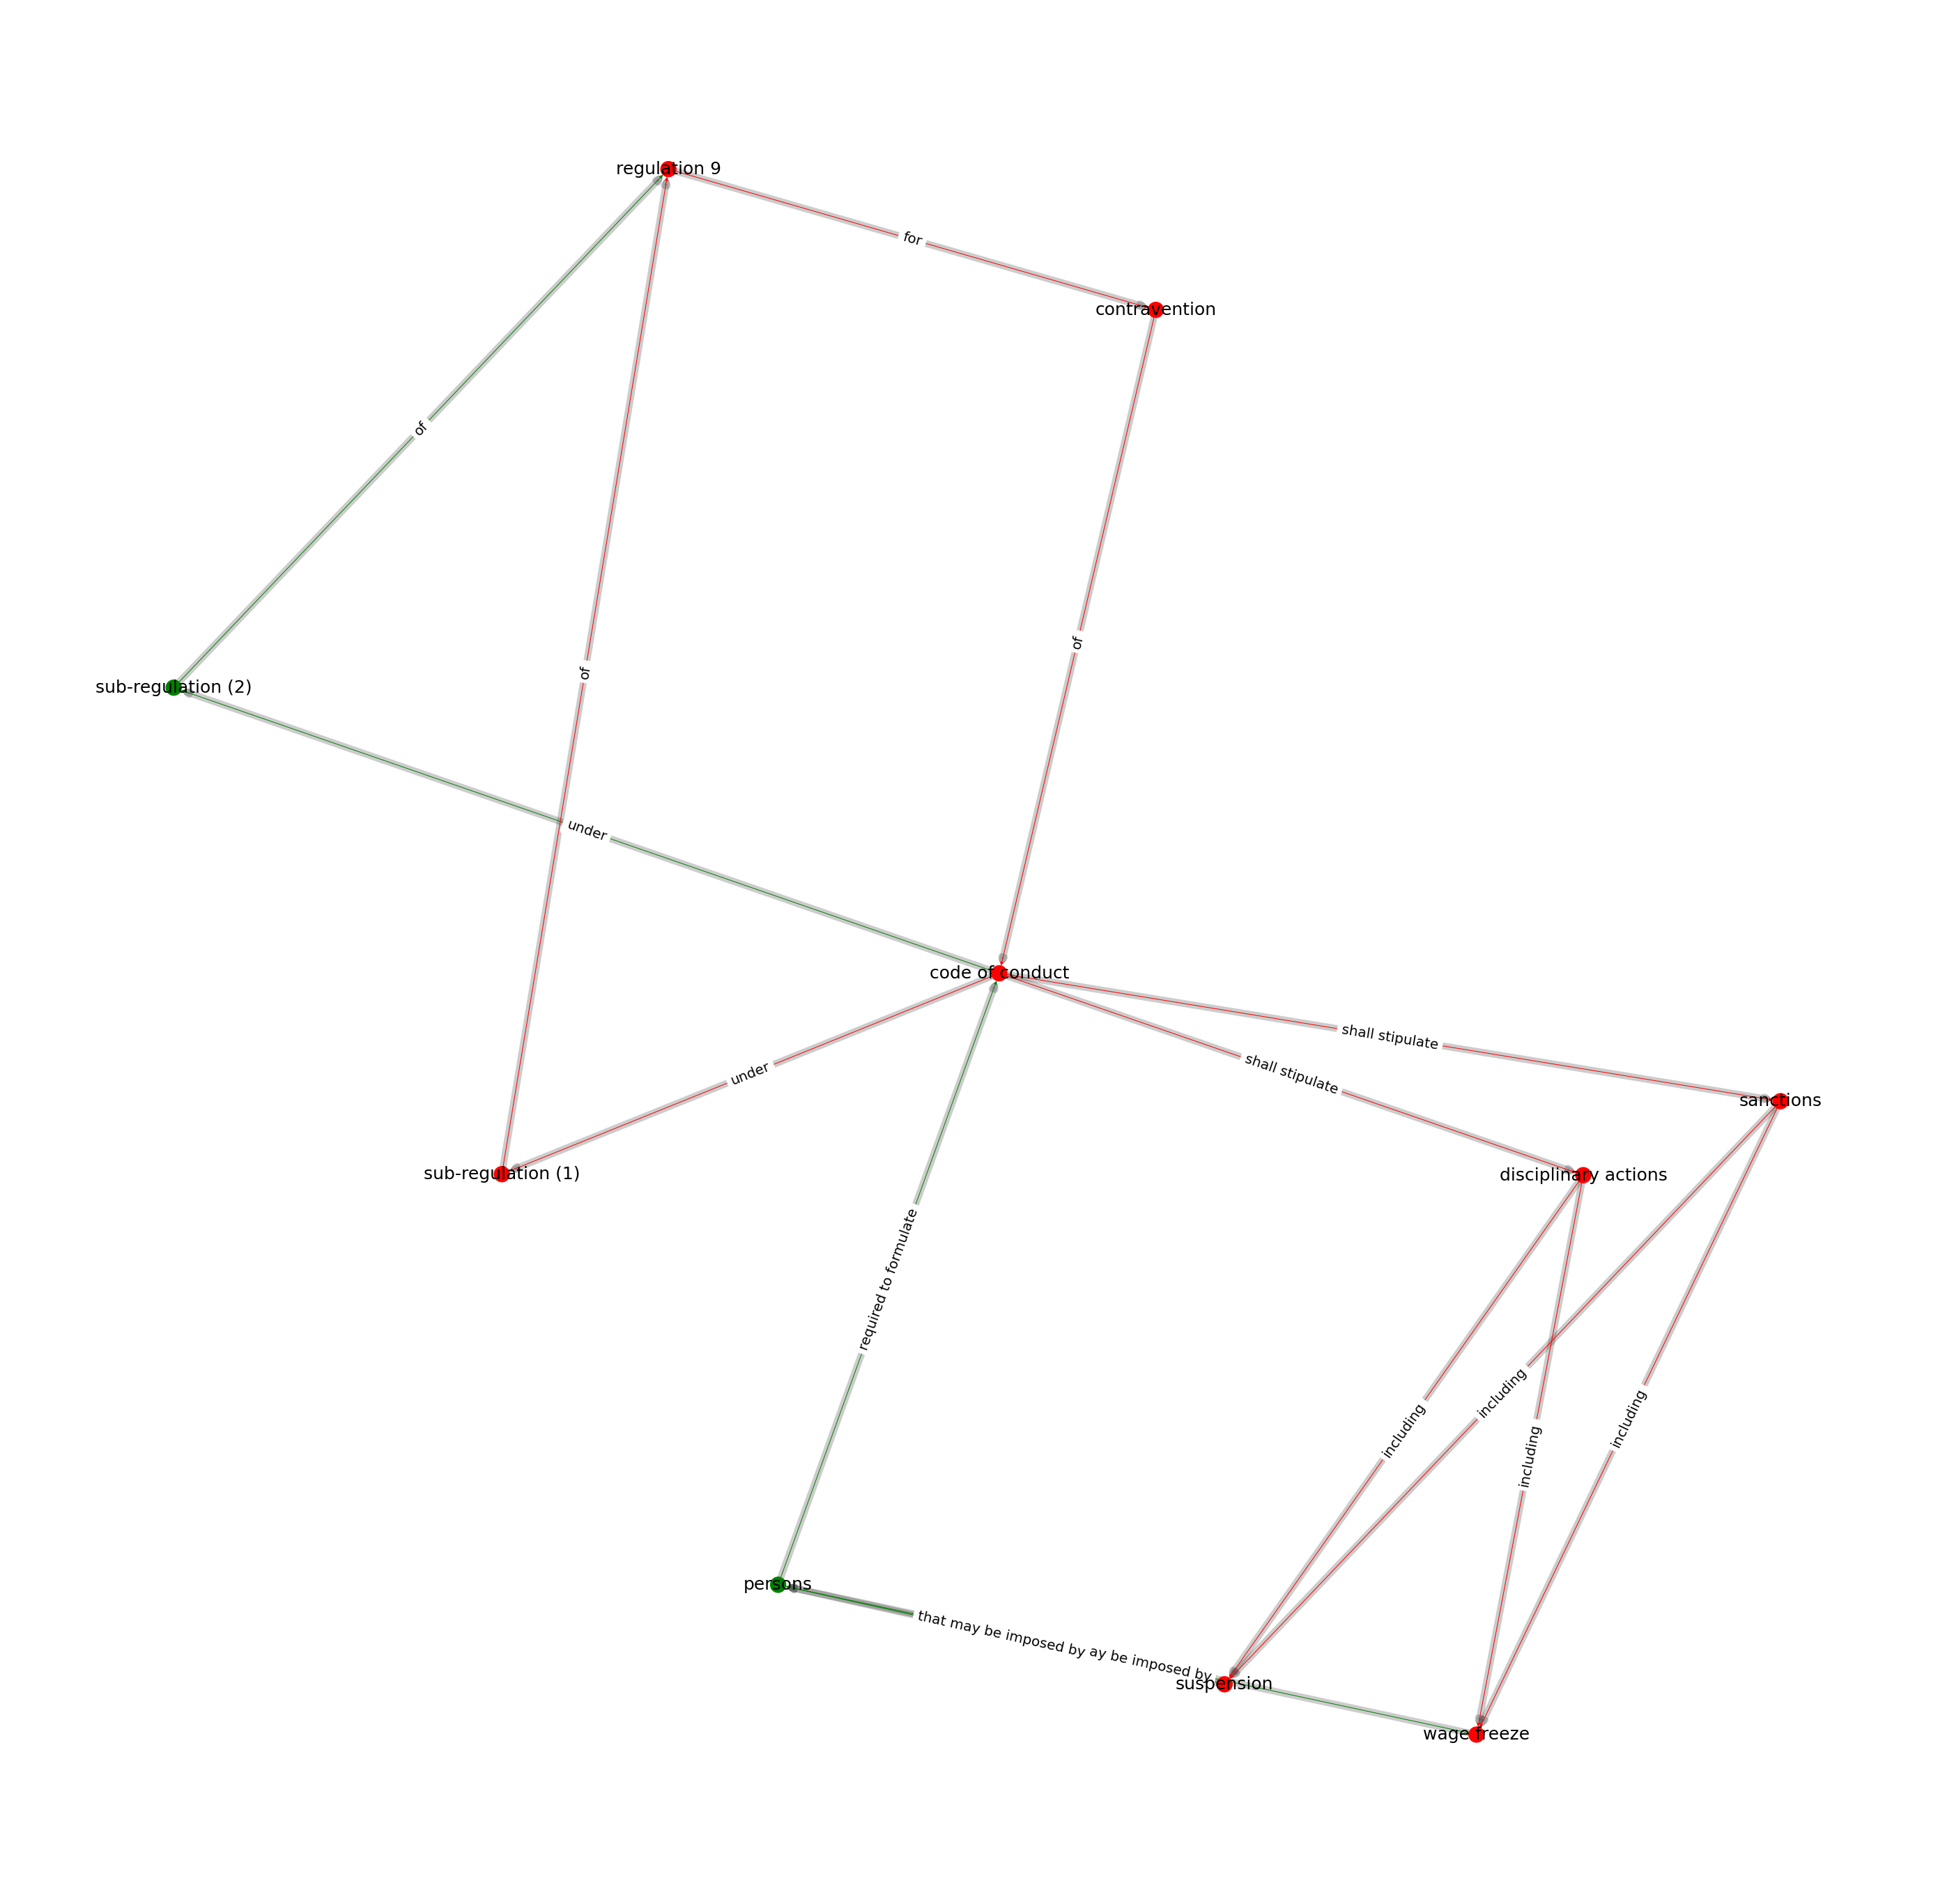

In [167]:
n_values0 = [val_map0.get(node, 0.5) for node in Ge0.nodes()]
e_values0 = [edge_val0.get(edge, 0.5) for edge in Ge0.edges()]
ncolor0 = []
ecolor0 = []
for i in n_values0:
    if(i == 1.0):
        ncolor0.append('green')
    else:
        ncolor0.append('red')
for i in e_values0:
    if(i == 1.0):
        ecolor0.append('green')
    else:
        ecolor0.append('red')

plt.figure(figsize=(50,50))
    
pos = nx.spring_layout(Ge0)
nx.draw_networkx_edges(Ge0, width=10.0,alpha = 0.2, pos=pos, length=20)
nx.draw_networkx_edge_labels(Ge0, pos = pos, edge_labels=e_label0,font_size=20)
nx.draw(Ge0, with_labels=True, node_color=ncolor0, edge_color = ecolor0, pos = pos, node_size = 500, font_size = 25)
plt.show()

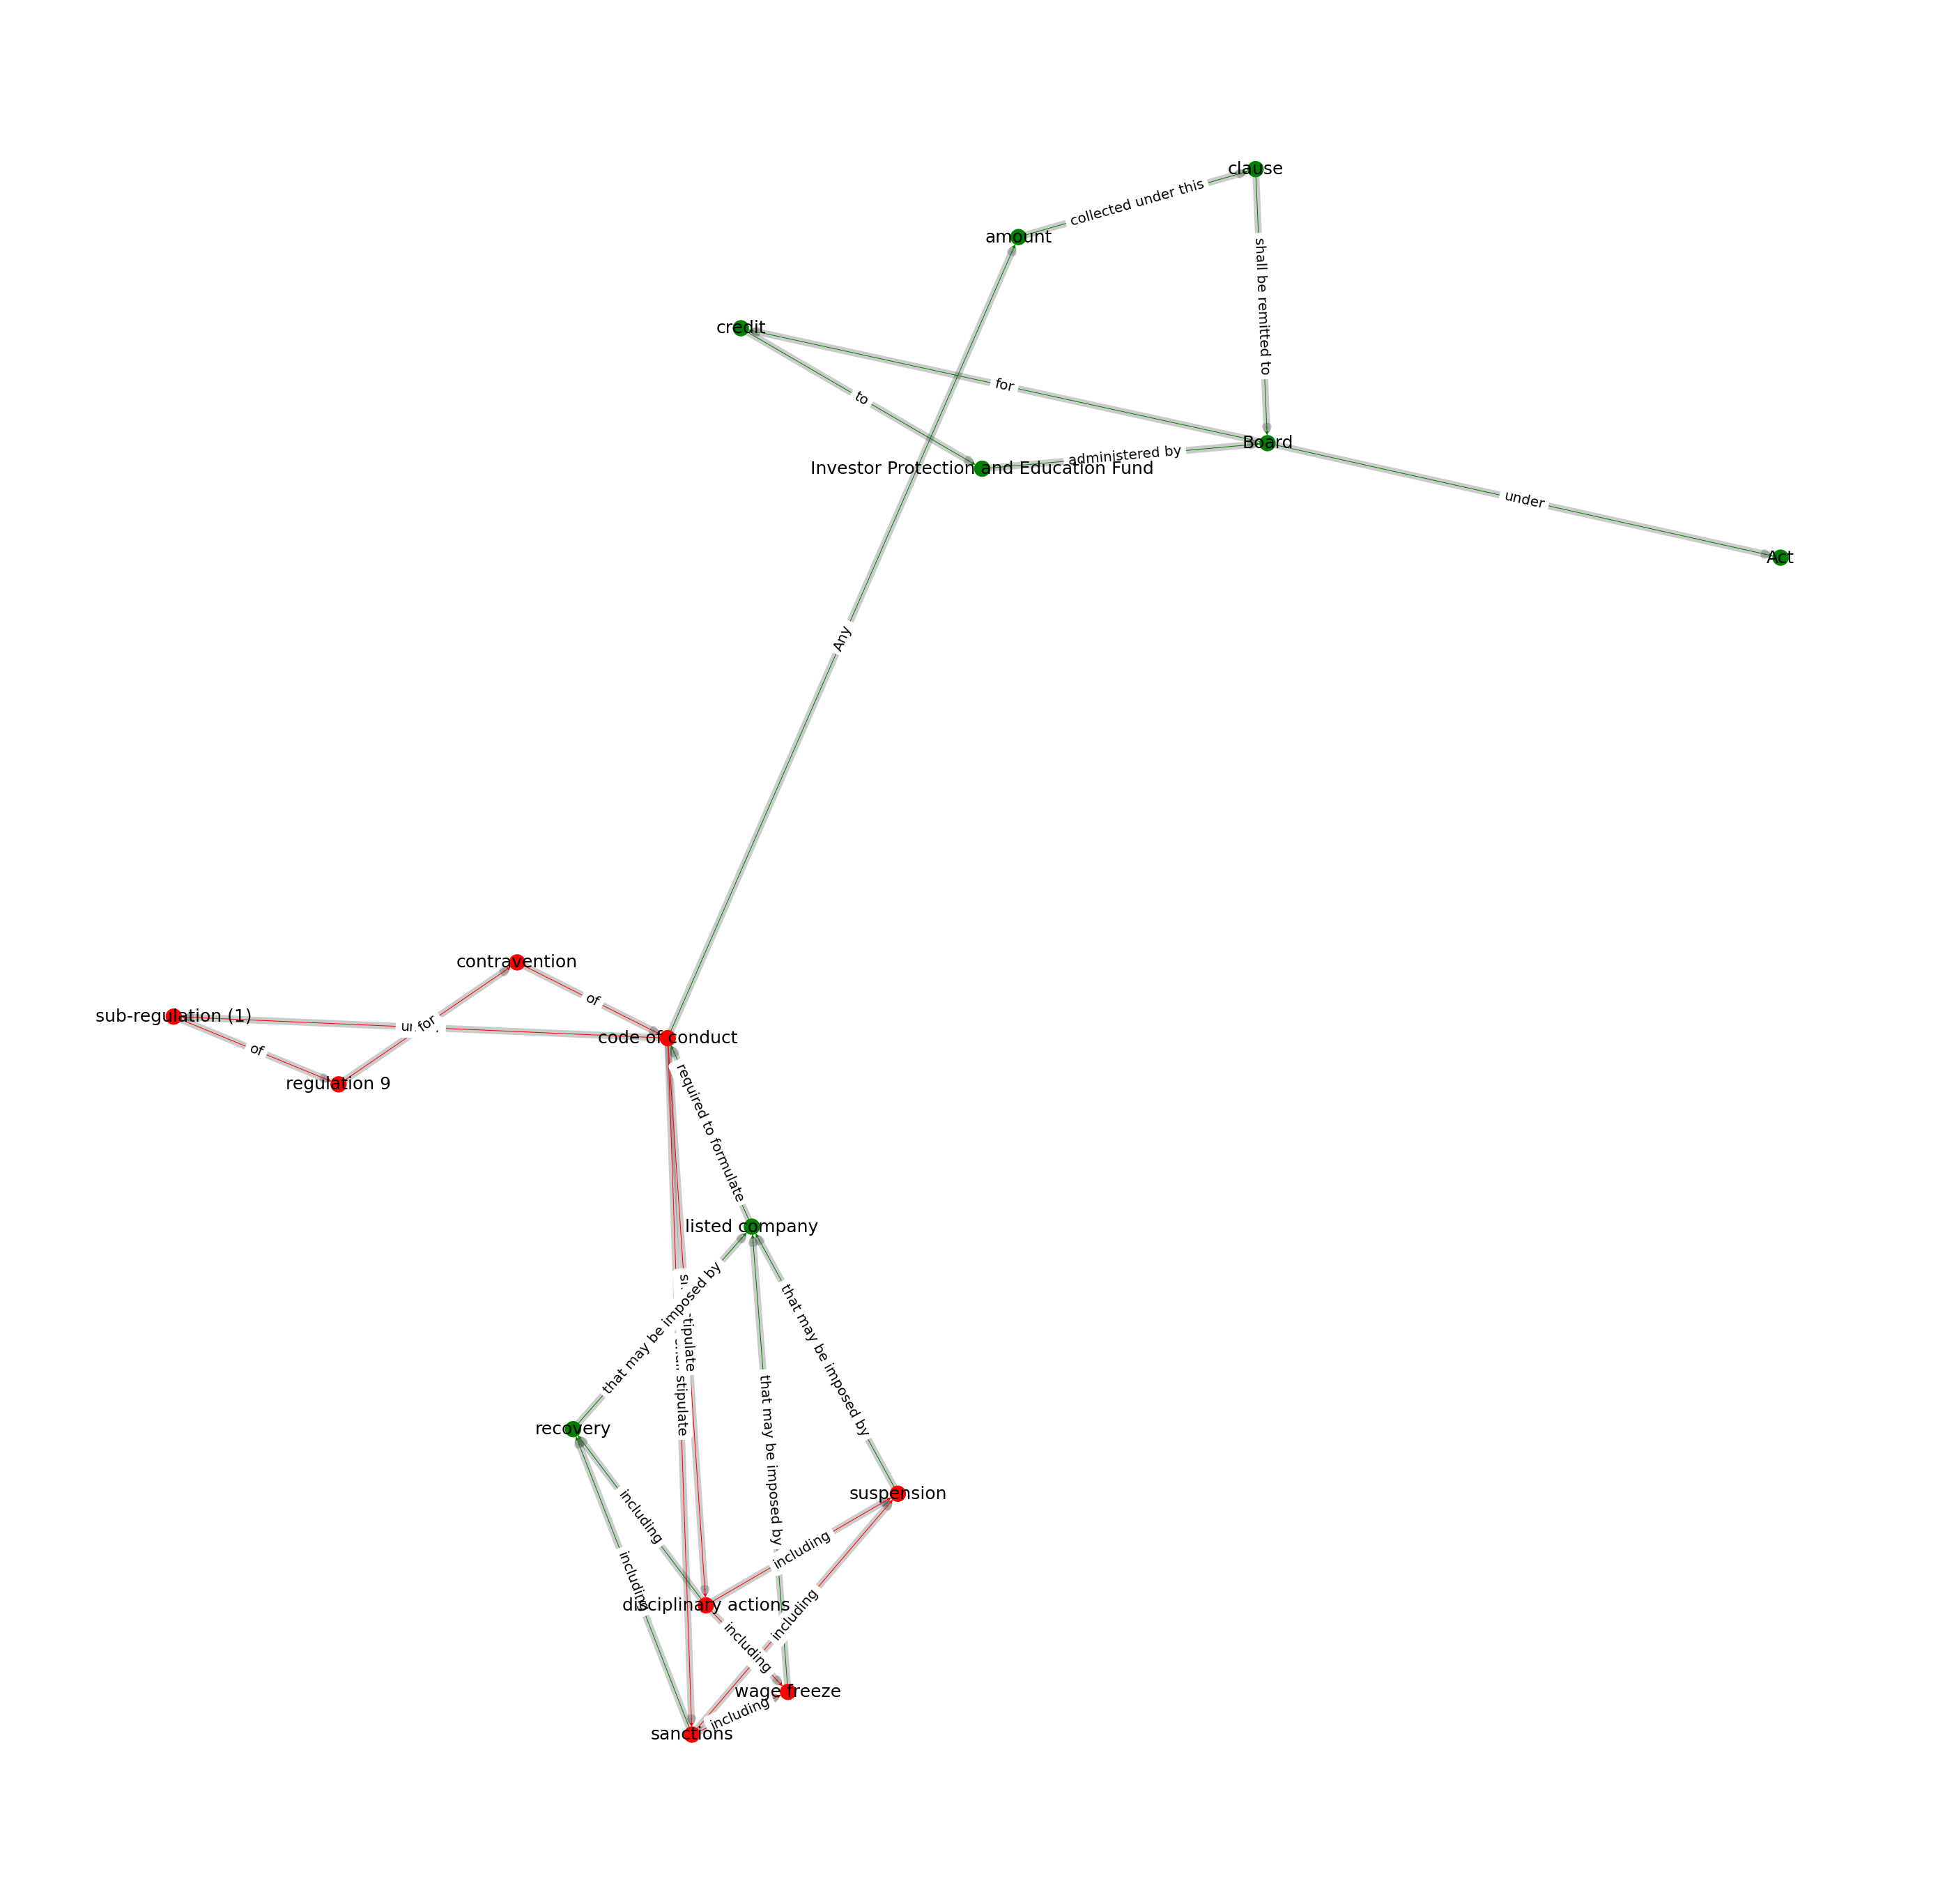

In [194]:
n_values1 = [val_map1.get(node, 0.5) for node in Ge1.nodes()]
e_values1 = [edge_val1.get(edge, 0.5) for edge in Ge1.edges()]
ncolor1 = []
ecolor1 = []
for i in n_values1:
    if(i == 1.0):
        ncolor1.append('green')
    else:
        ncolor1.append('red')
for i in e_values1:
    if(i == 1.0):
        ecolor1.append('green')
    else:
        ecolor1.append('red')

#Modifying the last 'Act' token colour to green as it occurs in a different position in older regulation
ncolor1[-1] = 'green'

plt.figure(figsize=(50,50))
    
pos = nx.spring_layout(Ge1)
nx.draw_networkx_edges(Ge1, width=10.0,alpha = 0.2, pos=pos, length=20)
nx.draw_networkx_edge_labels(Ge1, pos = pos, edge_labels=e_label1,font_size=20)
nx.draw(Ge1, with_labels=True, node_color=ncolor1, edge_color = ecolor1, pos = pos, node_size = 500, font_size = 25)
plt.show()

#### Extraction of Modified subgraphs of Graph 0

YET TO DO : Branching nodes - only one combination extracted

In [349]:
values0 = [0] * len(set0)
p = list(Ge0.edges())
t=0
while(t<len(e_values0)):
    edgepair = p[t]
    if(e_values0[t] == 1.0):
        ctr=0
        while(ctr<len(set0)):
            if(set0[ctr] == edgepair):
                values0[ctr] = 1.0
                break
            ctr += 1
    else:
        ctr=0
        while(ctr<len(set0)):
            if(set0[ctr] == edgepair):
                values0[ctr] = 0.5
                break
            ctr += 1
    t+=1

In [350]:
t=0
start = []
end = []
mapend = []
mapstart = []
while(t<len(values0)):
    if(values0[t] == 1.0):
        edgepair = set0[t]
        start.append(edgepair[0]) 
        if(t!=0):
            edgepair = set0[t-1]
            mapstart.append(edgepair[1])
        else:
            mapstart.append('')
        if(t != len(values0)-1):
            k=t
            while(k<len(values0)):
                if(values0[k] != 1.0):
                    edgepair = set0[k-1]
                    end.append(edgepair[1])
                    edgepair = set0[k]
                    mapend.append(edgepair[0])
                    t=k
                    break
                k+=1
            if(k == len(values0)):
                edgepair = set0[k-1]
                end.append(edgepair[1])
                mapend.append('')
                t=k-1
        else:
            edgepair = set0[t]
            end.append(edgepair[1])
            mapend.append('')
    t+=1

In [25]:
start0 = []
end0 = []
inter0 = []
mapstart0 = []
mapend0 = []
t=0
while(t<len(start)):
    inter = []
    start0.append(start[t])
    mapstart0.append(mapstart[t])
    p=t
    while(p<len(start)-1):
        if(start[p+1] != end[p]):
            break
        else:
            inter.append(end[p])
        p+=1
    if(p == len(start)-1):
        end0.append(end[p])
        inter0.append(inter)
        mapend0.append(mapend[p])
        break
    else:
        end0.append(end[p])
        mapend0.append(mapend[p])
        t=p
    inter0.append(inter)
    t+=1

NameError: name 'start' is not defined

In [352]:
ctr=0
while(ctr<len(start0)):
    s0 = nx.all_simple_paths(Ge0, start0[ctr], end0[ctr])
    inter = inter0[ctr]
    #nodes
    print('Nodes of Modified subgraphs')
    print('\n')
    path0 = []
    edgecounter = 0
    ecount = []
    for path in s0:
        check =  all(item in path for item in inter)
        if(check == True):
            #Ensure only green edges are included
            m=0
            while(m<len(path)-1):
                index = set0.index((path[m],path[m+1]))
                if(values0[index] != 1.0):
                    break
                m+=1
            if(m == len(path)-1):
                print(path)
                ecount.append(edgecounter)
        edgecounter = edgecounter+1
    print('\n')    
    #edges
    print('Modified subgraphs information')
    print('\n')
    s0 = nx.all_simple_paths(Ge0, start0[ctr], end0[ctr])
    
    edgecounter=0
    for edge in map(nx.utils.pairwise, s0):
        if(edgecounter in ecount):
            e = list(edge)
            t=0
            while(t<len(e)):
                e1 = e[t]
                print(e1[0])
                print(e_label0[e1])
                print(e1[1])
                print('-----------------')
                t+=1
        edgecounter = edgecounter+1
    print('\n')
    ctr+=1

Nodes of Modified subgraphs


['wage freeze', 'persons', 'code of conduct', 'sub-regulation (2)', 'regulation 9']


Modified subgraphs information


wage freeze
that may be imposed by
persons
-----------------
persons
required to formulate
code of conduct
-----------------
code of conduct
under
sub-regulation (2)
-----------------
sub-regulation (2)
of
regulation 9
-----------------




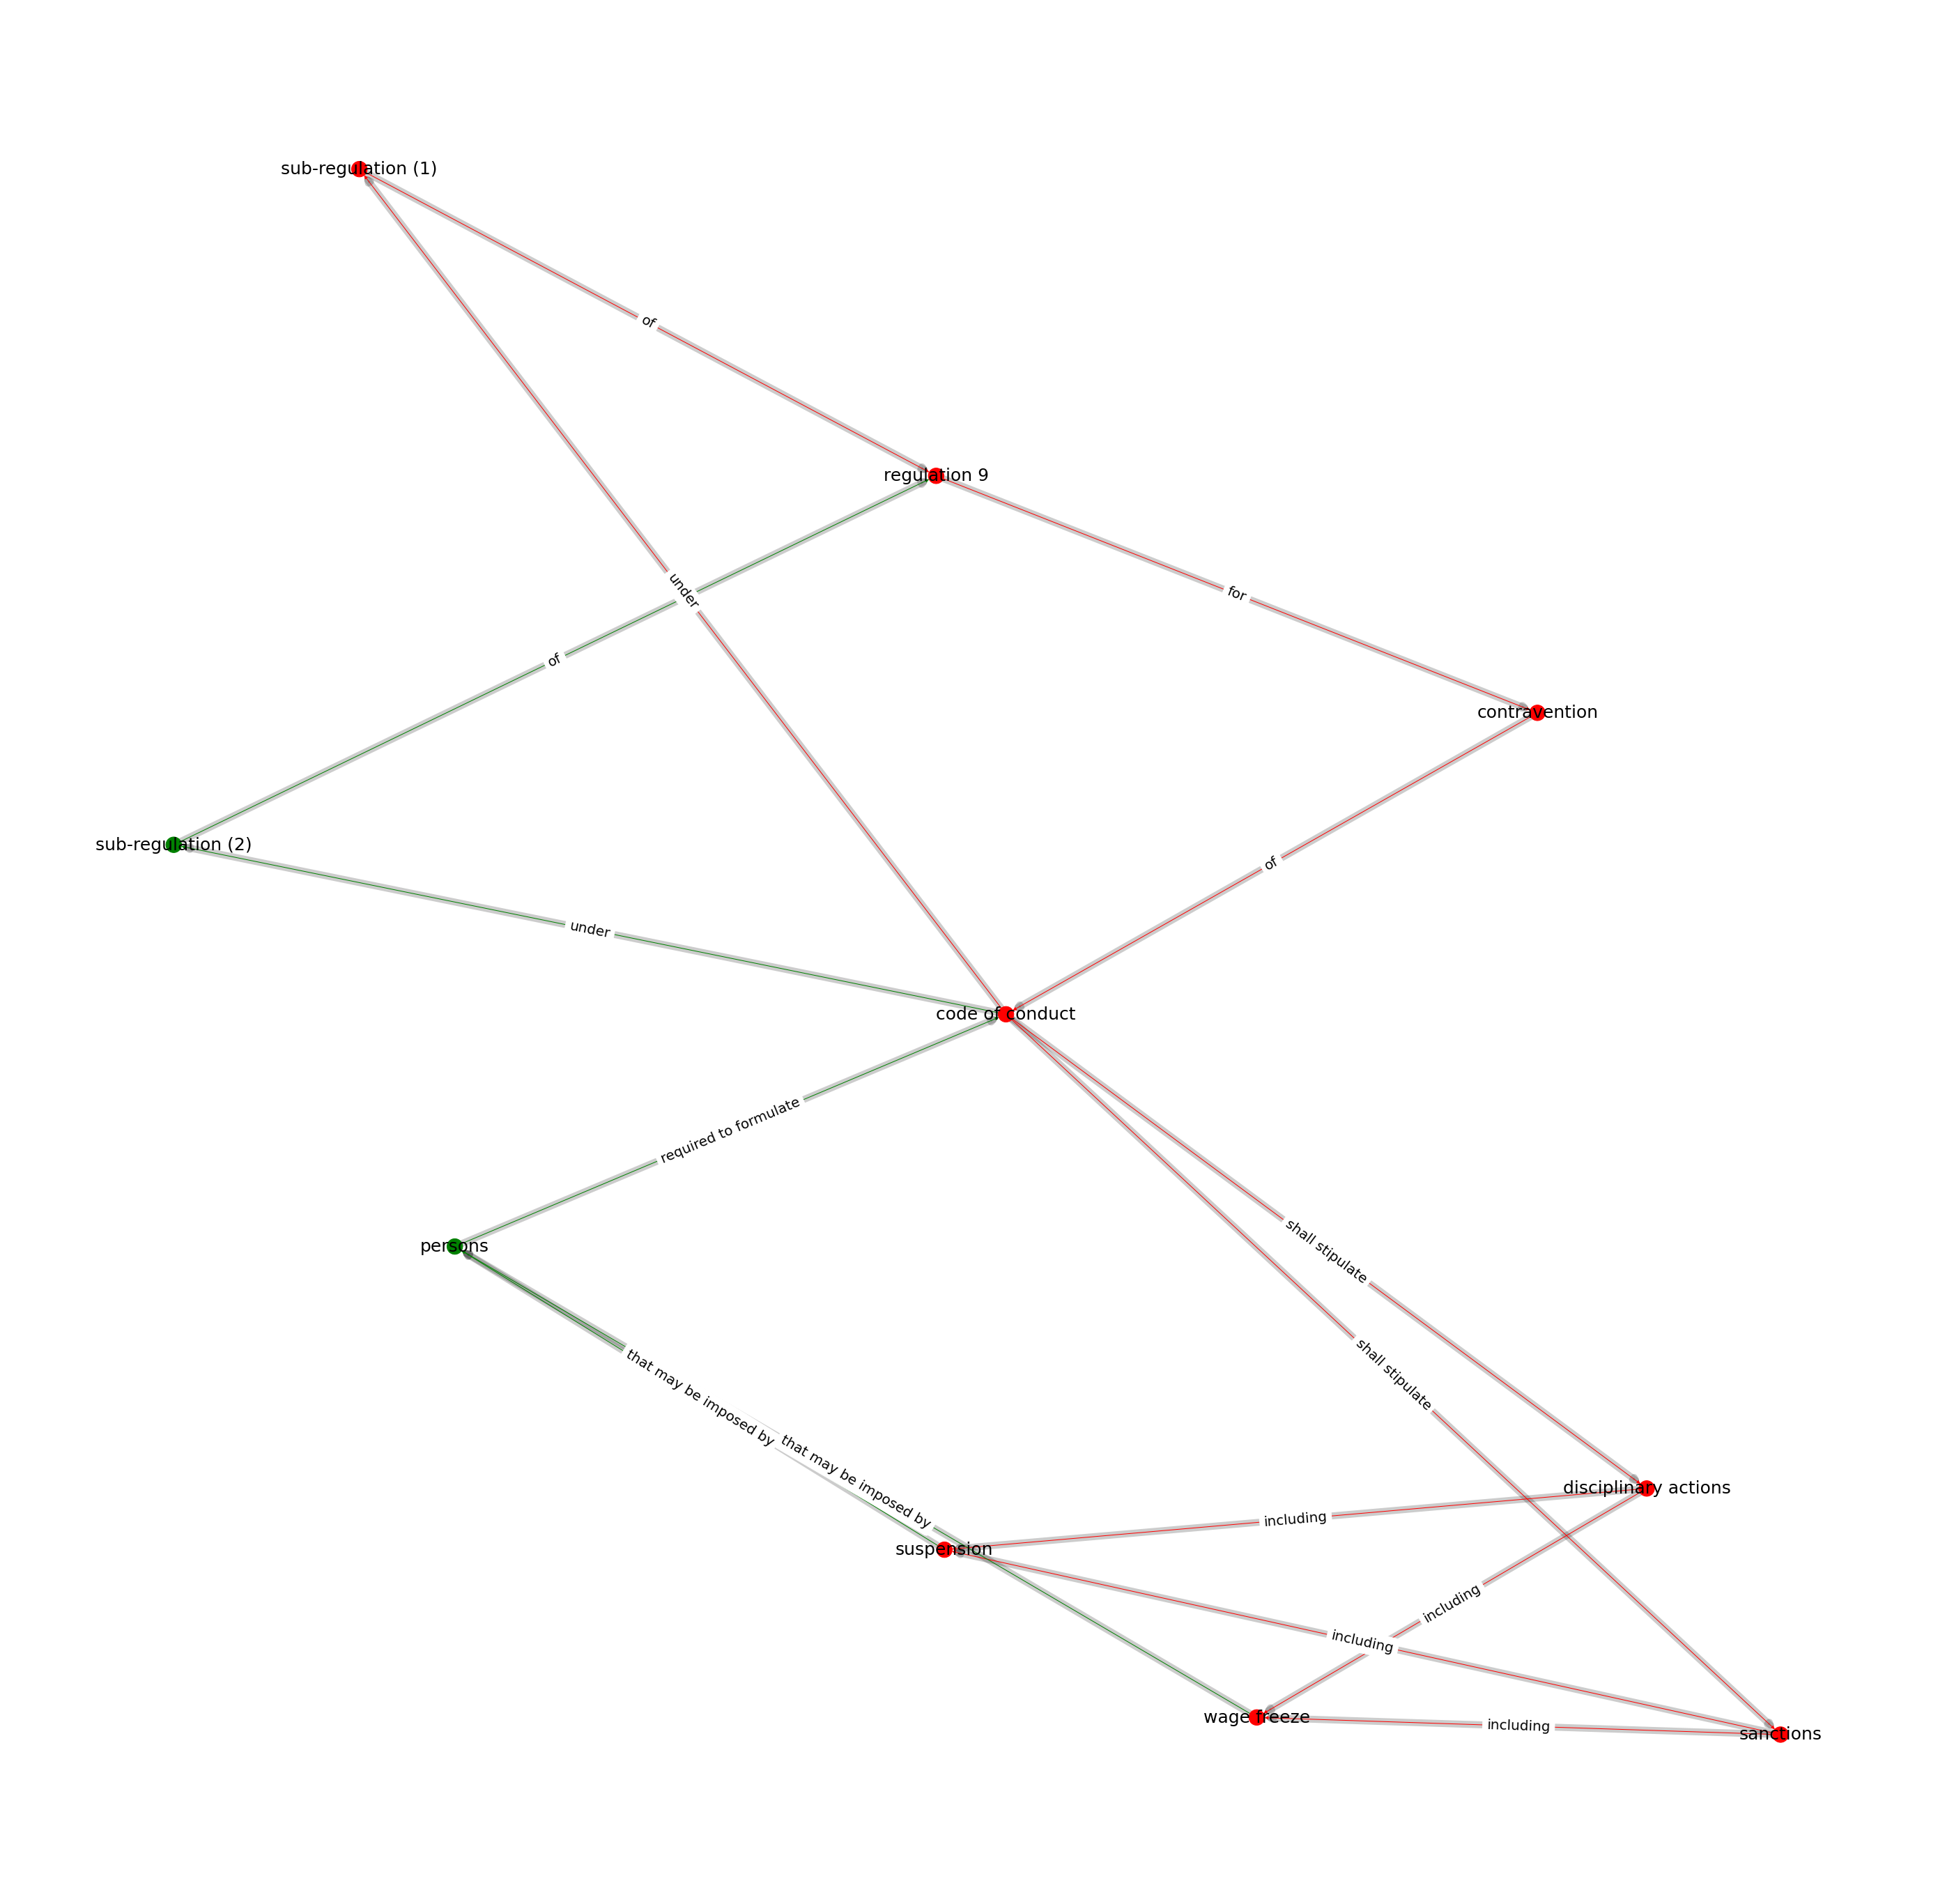

In [272]:
n_values0 = [val_map0.get(node, 0.5) for node in Ge0.nodes()]
e_values0 = [edge_val0.get(edge, 0.5) for edge in Ge0.edges()]
ncolor0 = []
ecolor0 = []
for i in n_values0:
    if(i == 1.0):
        ncolor0.append('green')
    else:
        ncolor0.append('red')
for i in e_values0:
    if(i == 1.0):
        ecolor0.append('green')
    else:
        ecolor0.append('red')

plt.figure(figsize=(50,50))
    
pos = nx.spring_layout(Ge0)
nx.draw_networkx_edges(Ge0, width=10.0,alpha = 0.2, pos=pos, length=20)
nx.draw_networkx_edge_labels(Ge0, pos = pos, edge_labels=e_label0,font_size=20)
nx.draw(Ge0, with_labels=True, node_color=ncolor0, edge_color = ecolor0, pos = pos, node_size = 500, font_size = 25)
plt.show()

#### Extraction of Modified subgraphs of Graph 1

In [353]:
values1 = [0] * len(set1)
p = list(Ge1.edges())
t=0
while(t<len(e_values1)):
    edgepair = p[t]
    if(e_values1[t] == 1.0):
        ctr=0
        while(ctr<len(set1)):
            if(set1[ctr] == edgepair):
                values1[ctr] = 1.0
                break
            ctr += 1
    else:
        ctr=0
        while(ctr<len(set1)):
            if(set1[ctr] == edgepair):
                values1[ctr] = 0.5
                break
            ctr += 1
    t+=1

In [354]:
t=0
start = []
end = []
mapend = []
mapstart = []
while(t<len(values1)):
    if(values1[t] == 1.0):
        edgepair = set1[t]
        start.append(edgepair[0]) 
        if(t!=0):
            edgepair = set1[t-1]
            mapstart.append(edgepair[1])
        else:
            mapstart.append('')
        if(t != len(values1)-1):
            k=t
            while(k<len(values1)):
                if(values1[k] != 1.0):
                    edgepair = set1[k-1]
                    end.append(edgepair[1])
                    edgepair = set1[k]
                    mapend.append(edgepair[0])
                    t=k
                    break
                k+=1
            if(k == len(values1)):
                edgepair = set1[k-1]
                end.append(edgepair[1])
                mapend.append('')
                t=k-1
        else:
            edgepair = set1[t]
            end.append(edgepair[1])
            mapend.append('')
    t+=1

In [355]:
start1 = []
end1 = []
inter1 = []
mapstart1 = []
mapend1 = []
t=0
while(t<len(start)):
    inter = []
    start1.append(start[t])
    mapstart1.append(mapstart[t])
    p=t
    while(p<len(start)-1):
        if(start[p+1] != end[p]):
            break
        else:
            inter.append(end[p])
        p+=1
    if(p == len(start)-1):
        end1.append(end[p])
        inter1.append(inter)
        mapend1.append(mapend[p])
        break
    else:
        end1.append(end[p])
        mapend1.append(mapend[p])
        t=p
    inter1.append(inter)
    t+=1

In [356]:
ctr=0
while(ctr<len(start1)):
    s1 = nx.all_simple_paths(Ge1, start1[ctr], end1[ctr])
    inter = inter1[ctr]
    #nodes
    print('Nodes of Modified subgraphs')
    print('\n')
    path1 = []
    edgecounter = 0
    ecount = []
    for path in s1:
        check =  all(item in path for item in inter)
        if(check == True):
            #Ensure only green edges are included
            m=0
            while(m<len(path)-1):
                index = set1.index((path[m],path[m+1]))
                if(values1[index] != 1.0):
                    break
                m+=1
            if(m == len(path)-1):
                print(path)
                ecount.append(edgecounter)
        edgecounter = edgecounter+1
    print('\n')    
    #edges
    print('Modified subgraphs information')
    print('\n')
    s1 = nx.all_simple_paths(Ge1, start1[ctr], end1[ctr])
    
    edgecounter=0
    for edge in map(nx.utils.pairwise, s1):
        if(edgecounter in ecount):
            e = list(edge)
            t=0
            while(t<len(e)):
                e1 = e[t]
                print(e1[0])
                print(e_label1[e1])
                print(e1[1])
                print('-----------------')
                t+=1
        edgecounter = edgecounter+1
    print('\n')
    ctr+=1

Nodes of Modified subgraphs


['sanctions', 'recovery', 'listed company', 'code of conduct', 'amount', 'clause', 'Board', 'Act']


Modified subgraphs information


sanctions
including
recovery
-----------------
recovery
that may be imposed by
listed company
-----------------
listed company
required to formulate
code of conduct
-----------------
code of conduct
Any
amount
-----------------
amount
collected under this
clause
-----------------
clause
shall be remitted to
Board
-----------------
Board
under
Act
-----------------




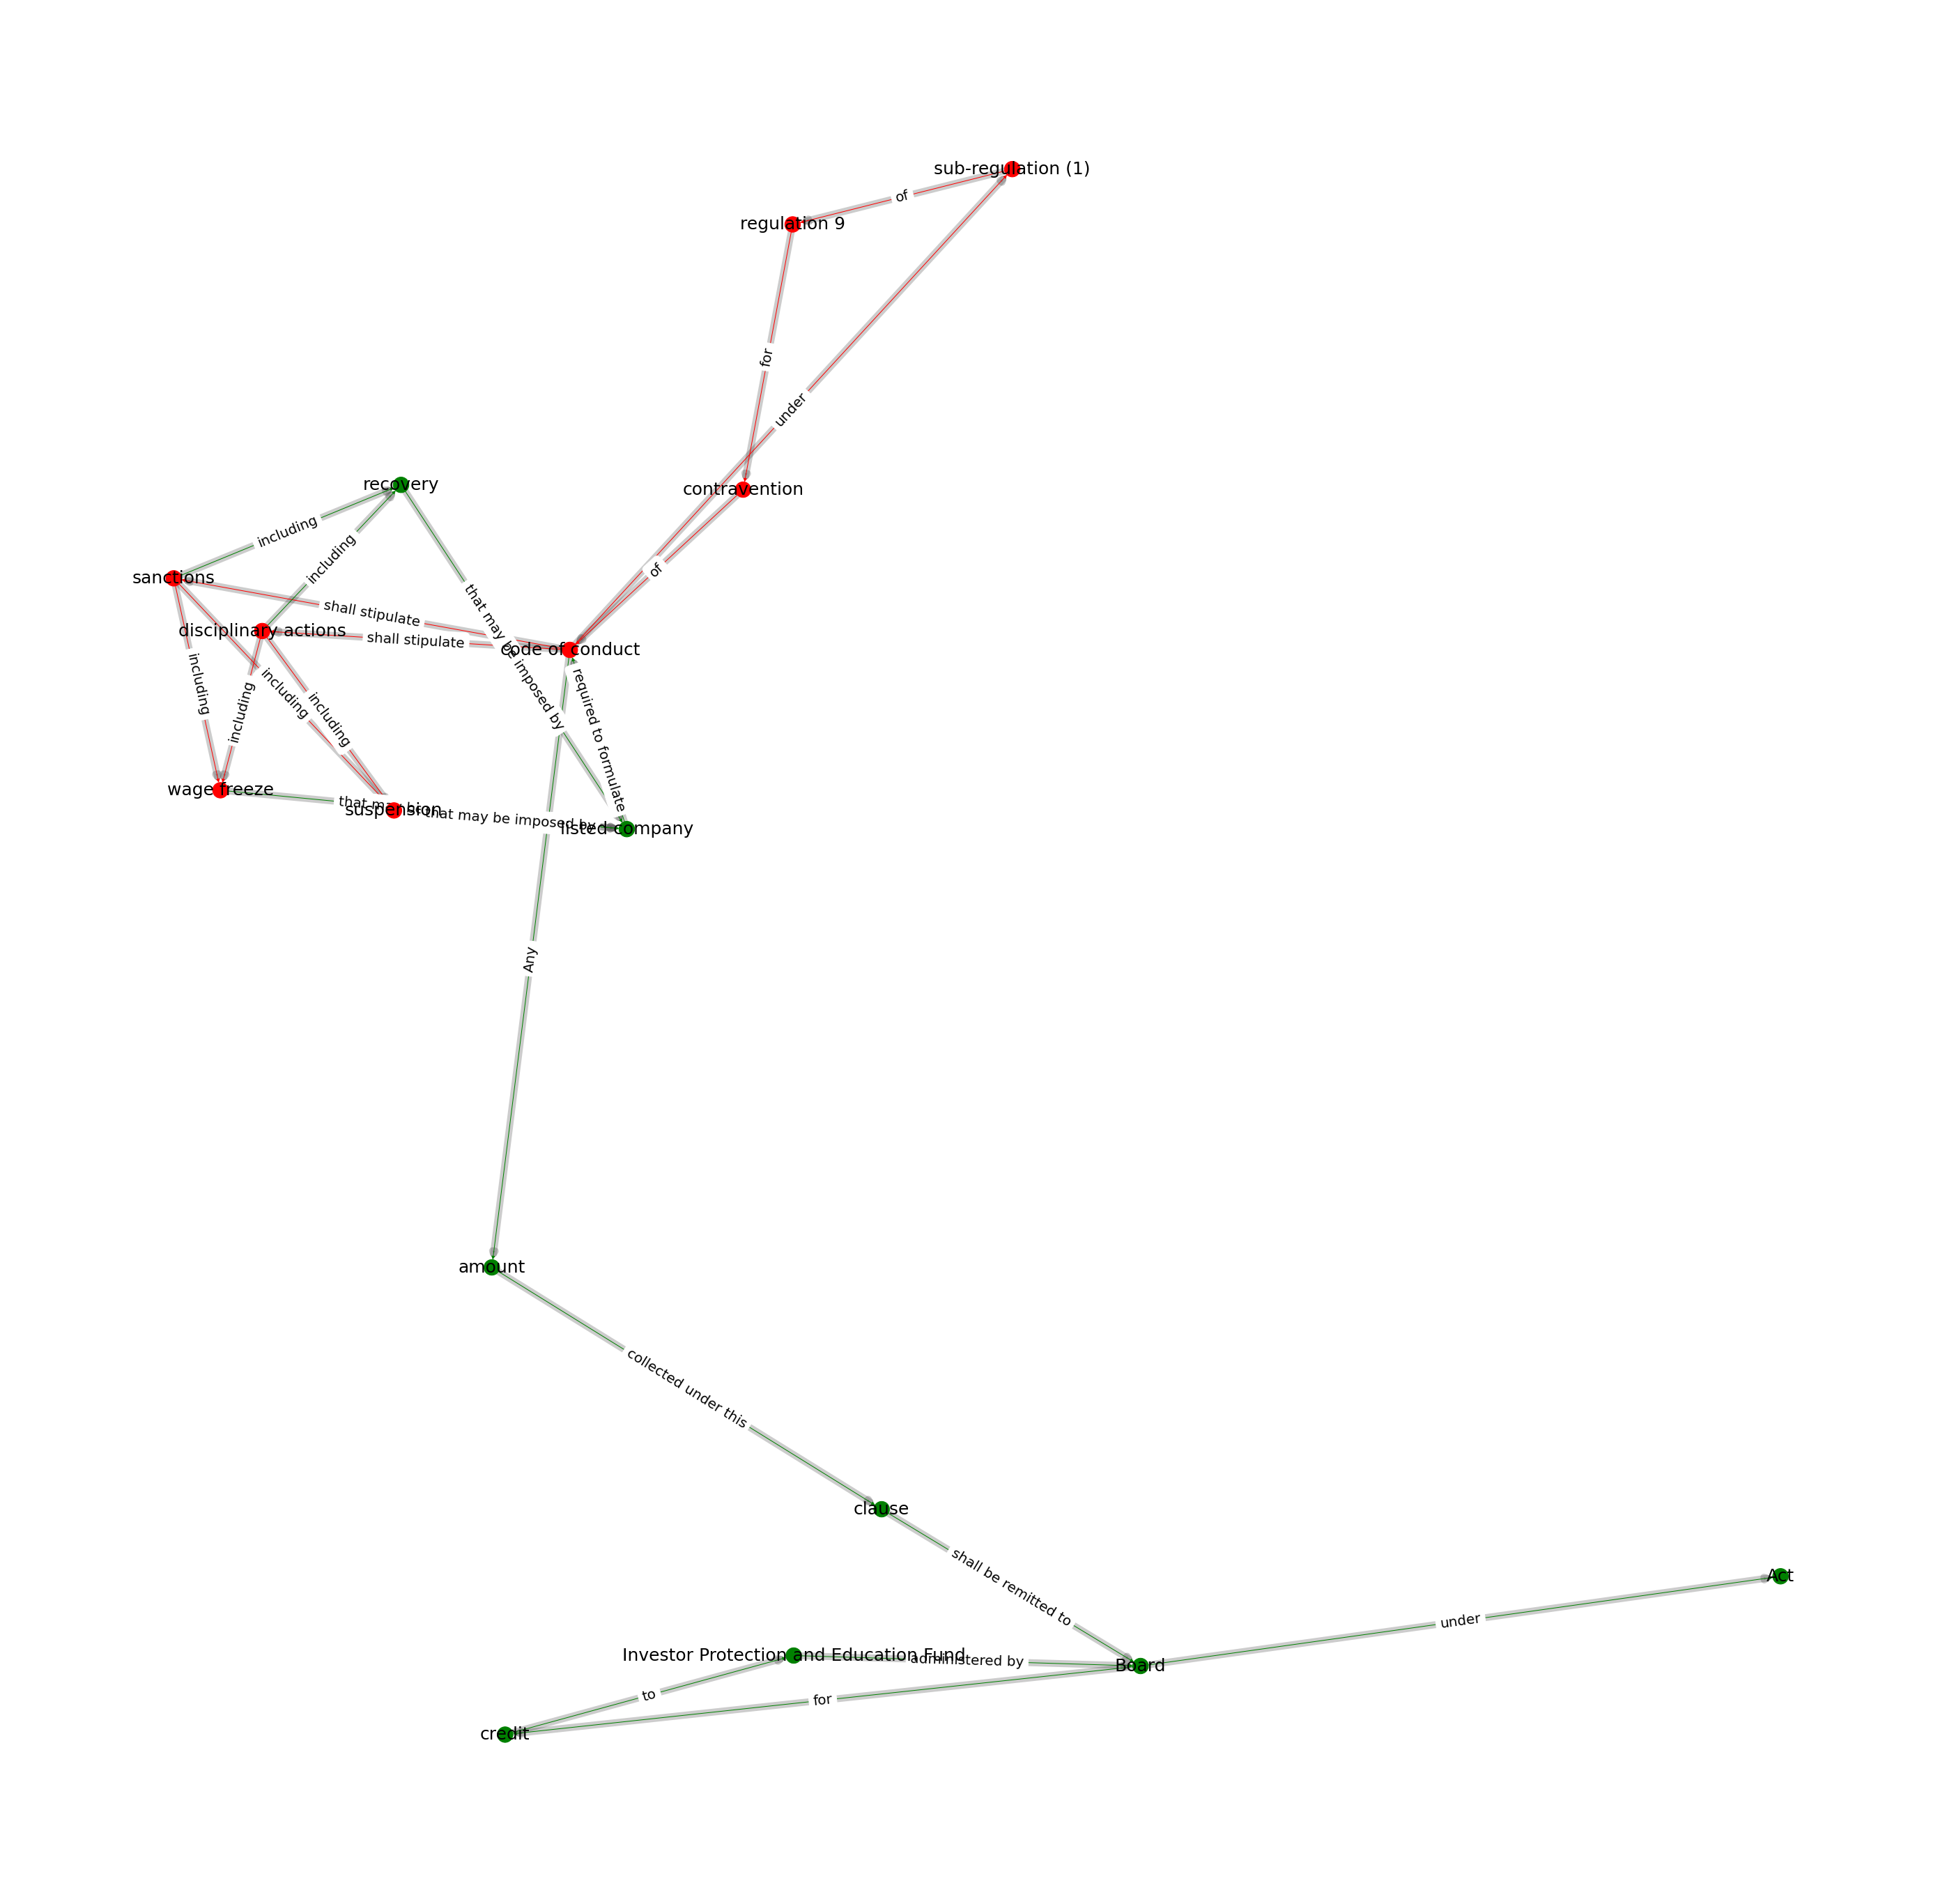

In [341]:
n_values1 = [val_map1.get(node, 0.5) for node in Ge1.nodes()]
e_values1 = [edge_val1.get(edge, 0.5) for edge in Ge1.edges()]
ncolor1 = []
ecolor1 = []
for i in n_values1:
    if(i == 1.0):
        ncolor1.append('green')
    else:
        ncolor1.append('red')
for i in e_values1:
    if(i == 1.0):
        ecolor1.append('green')
    else:
        ecolor1.append('red')

#Modifying the last 'Act' token colour to green as it occurs in a different position in older regulation
ncolor1[-1] = 'green'

plt.figure(figsize=(50,50))
    
pos = nx.spring_layout(Ge1)
nx.draw_networkx_edges(Ge1, width=10.0,alpha = 0.2, pos=pos, length=20)
nx.draw_networkx_edge_labels(Ge1, pos = pos, edge_labels=e_label1,font_size=20)
nx.draw(Ge1, with_labels=True, node_color=ncolor1, edge_color = ecolor1, pos = pos, node_size = 500, font_size = 25)
plt.show()

Mapping the subgraph modifications

In [24]:
mapped_subgraphs = {}
t=0
for i in mapstart0:
    if(i in mapstart1):
        mapped_subgraphs[t] = mapstart1.index(i)
    t+=1

mapped_indices = list(mapped_subgraphs.keys())
t=0
while(t<len(mapstart0)):
    if(t not in mapped_indices):
        if(mapend0[t] in mapend1):
            mapped_subgraphs[t] = mapend1.index(mapend0[t])
    t+=1

NameError: name 'mapstart0' is not defined

In [367]:
mapped_subgraphs

{0: 0}

#### Amendment to Regulatory Document

In [2]:
from io import StringIO

from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser

def convert_pdf_to_string(file_path):

	output_string = StringIO()
	with open(file_path, 'rb') as in_file:
	    parser = PDFParser(in_file)
	    doc = PDFDocument(parser)
	    rsrcmgr = PDFResourceManager()
	    device = TextConverter(rsrcmgr, output_string, laparams=LAParams())
	    interpreter = PDFPageInterpreter(rsrcmgr, device)
	    for page in PDFPage.create_pages(doc):
	        interpreter.process_page(page)

	return(output_string.getvalue())

                
def convert_title_to_filename(title):
    filename = title.lower()
    filename = filename.replace(' ', '_')
    return filename


def split_to_title_and_pagenum(table_of_contents_entry): #Can be used to print regulations chapterwise
    title_and_pagenum = table_of_contents_entry.strip()
    
    title = None
    pagenum = None
    
    if len(title_and_pagenum) > 0:
        if title_and_pagenum[-1].isdigit():
            i = -2
            while title_and_pagenum[i].isdigit():
                i -= 1

            title = title_and_pagenum[:i].strip()
            pagenum = int(title_and_pagenum[i:].strip())
        
    return title, pagenum

In [3]:
text = convert_pdf_to_string(
    '/home/deepti-saravanan/Desktop/amendment_data/amendment.PDF')

In [4]:
t=0
for i in text.split():
    if(i == '3.'):
        print(t)
        break
    t=t+1

143


In [5]:
t=143
txt = text.split()
while(t<len(txt)):
    if(txt[t] == 'I.'):
        print(t)
        break
    t+=1

159


In [6]:
t=143
txt = text.split()
while(t<len(txt)):
    if(txt[t] == 'Schedule'):
        print(t)
        break
    t+=1

420


In [7]:
t=420
txt = text.split()
while(t<len(txt)):
    if(txt[t] == 'SECURITIES'):
        print(t)
        break
    t+=1

748


Regulations Modification

In [8]:
t=159
last = 418
s = ''
regind = []
subregind = []
modtext = []
while(t<last):
    if(txt[t] == 'regulation' and txt[t-2].isalpha() == False):
        #print(txt[t+1])
        p=t+1
        regind.append(txt[p])
        while(p<last):
            if(txt[p] == 'regulation' and txt[p-2].isalpha() == False):
                if('I' in txt[p-2] or 'V' in txt[p-2]):
                    t=p-1
                    break
                else:
                    if(p == last-1):
                        modtext.append(s)
                        s= ''
                        break
                    else:
                        s = s + ' ' + txt[k]
            elif(txt[p] == 'sub-regulation'):
                subregind.append(txt[p+1])
                if(txt[p-1].isalpha() == True):
                    k=p-1
                    while(k<last):
                        if(txt[k] == 'regulation' and txt[k-2].isalpha() == False and ('I' in txt[k-2] or 'V' in txt[k-2])):
                            #print(txt[k])
                            modtext.append(s)
                            s= ''
                            p=k-1
                            break
                        elif(txt[k] == 'sub-regulation'):
                            if(k!=p):
                                prev = regind[-1]
                                regind.append(prev)
                                modtext.append(s)
                                s= ''
                                p=k-1
                                break
                            #else:
                            #    modtext.append(s)
                            #    s= ''
                        else:
                            if(k == last-1):
                                s = s + ' ' + txt[k]
                                p=k
                                break
                            else:
                                s = s + ' ' + txt[k]
                        k+=1
                else:
                    k=p
                    while(k<last):
                        if(txt[k] == 'regulation' and txt[k-2].isalpha() == False and ('I' in txt[k-2] or 'V' in txt[k-2])):
                            s= ''
                            p=k-1
                            break
                        elif(txt[k] == 'sub-regulation'):
                            if(k!=p):
                                prev = regind[-1]
                                regind.append(prev)
                                modtext.append(s)
                                s= ''
                                p=k-1
                                break
                            #else:
                             #   modtext.append(s)
                              #  s= ''
                        else:
                            if(k == last-1):
                                s = s + ' ' + txt[k]
                                p=k
                                break
                            else:
                                s = s + ' ' + txt[k]
                        k+=1
            else:
                s = s + ' ' + txt[p]
                      
            if(p==last-1):
                modtext.append(s)
                s= ''
                t=p
            p+=1
    t+=1

In [9]:
print(len(regind))
print(len(subregind))
print(len(modtext))

3
3
3


In [10]:
t=0
while(t<len(regind)):
    if(',' in regind[t]):
        regind[t] = regind[t].replace(',','')
    t+=1
t=0
while(t<len(subregind)):
    if(',' in subregind[t]):
        subregind[t] = subregind[t].replace(',','')
    t+=1

In [11]:
regind

['3', '3', '7']

In [12]:
subregind

['5', '5', '2']

In [13]:
modtext

[' 3, 1 i. 5, shall be substituted with the following, namely- “(5) The board of directors or head(s) of the organisation of every person required to handle unpublished price sensitive information shall ensure that a structured digital database is maintained containing the nature of unpublished price sensitive information and the names of such persons who have shared the information and also the names of such persons with whom information is shared under this regulation along with the Permanent Account Number or any other identifier authorized by law where Permanent Account Number is not available. Such database shall not be outsourced and shall be maintained internally with adequate internal controls and checks such as time stamping and audit trails to ensure non-tampering of the database.” ii. after',
 ' after 5, the following shall be inserted, namely, - “(6) The board of directors or head(s) of the organisation of every person required to handle unpublished price sensitive informat

In [14]:
txtnew = []
t=0
while(t<600):
    txtnew.append(txt[t])
    t+=1

In [15]:
t=685
while(t<689):
    txtnew.append(txt[t])
    t+=1

In [16]:
t = 600
while(t<684):
    txtnew.append(txt[t])
    t+=1

In [17]:
t = 689
while(t<len(txt)):
    txtnew.append(txt[t])
    t+=1

In [18]:
txt = txtnew

Schedule Modification

In [19]:
t=420
last = 748
s = ''
schind = []
clauseind = []
modctext = []
while(t<last):
    if(txt[t] == 'Schedule' and txt[t-2].isalpha() == False):
        #print(t)
        p=t+1
        schind.append(txt[p])
        while(p<last):
            if(txt[p] == 'Schedule' and txt[p-2].isalpha() == False):
                if('I' in txt[p-2] or 'V' in txt[p-2]):
                    t=p-1
                    break
                else:
                    if(p == last-1):
                        modctext.append(s)
                        s= ''
                        break
                    else:
                        s = s + ' ' + txt[k]
            elif(txt[p] == 'clause' and (txt[p-2].isalpha() == False or txt[p-1].isalpha() == False) and ('i' in txt[p-2] or 'v' in txt[p-2] or 'i' in txt[p-1] or 'v' in txt[p-1])):
                clauseind.append(txt[p+1])
                if(txt[p-1].isalpha() == True):
                    k=p-1
                    while(k<last):
                        if(txt[k] == 'Schedule' and txt[k-2].isalpha() == False and ('I' in txt[k-2] or 'V' in txt[k-2])):
                            #print(txt[k])
                            modctext.append(s)
                            #print(modctext)
                            s= ''
                            p=k-1
                            break
                        elif(txt[k] == 'clause' and (txt[k-2].isalpha() == False or txt[k-1].isalpha() == False) and ('i' in txt[k-2] or 'v' in txt[k-2] or 'i' in txt[k-1] or 'v' in txt[k-1])):
                            if(k!=p):
                                prev = schind[-1]
                                #print(prev)
                                #print(txt[k+1])
                                schind.append(prev)
                                modctext.append(s)
                                #print(modctext)
                                s = ''
                                p=k-1
                                break
                            #else:
                            #    modtext.append(s)
                            #    s= ''
                        else:
                            if(k == last-1):
                                s = s + ' ' + txt[k]
                                p=k
                                break
                            else:
                                s = s + ' ' + txt[k]
                        k+=1
                else:
                    k=p
                    while(k<last):
                        if(txt[k] == 'Schedule' and txt[k-2].isalpha() == False and ('I' in txt[k-2] or 'V' in txt[k-2])):
                            s= ''
                            p=k-1
                            break
                        elif(txt[k] == 'clause' and (txt[k-2].isalpha() == False or txt[k-1].isalpha() == False) and ('i' in txt[k-2] or 'v' in txt[k-2] or 'i' in txt[k-1] or 'v' in txt[k-1])):
                            if(k!=p):
                                prev = schind[-1]
                                schind.append(prev)
                                modctext.append(s)
                                #print(modctext)
                                s = ''
                                p=k-1
                                break
                            #else:
                             #   modtext.append(s)
                              #  s= ''
                        else:
                            if(k == last-1):
                                s = s + ' ' + txt[k]
                                p=k
                                break
                            else:
                                s = s + ' ' + txt[k]
                        k+=1
            else:
                #s = s + ' ' + txt[p]
                print('null')
        
            if(p==last-1):
                #print(s)
                modctext.append(s)
                s= ''
                t=p
            p+=1
    t+=1

null
null
null
null
null
null


In [20]:
print(len(schind))
print(len(clauseind))
print(len(modctext))

5
5
5


In [21]:
t=0
while(t<len(schind)):
    if(',' in schind[t]):
        schind[t] = schind[t].replace(',','')
    t+=1
t=0
while(t<len(clauseind)):
    if(',' in clauseind[t]):
        clauseind[t] = clauseind[t].replace(',','')
    t+=1

In [22]:
schind

['B', 'B', 'B', 'C', 'C']

In [23]:
clauseind

['4', '12', '13', '10', '11']

In [24]:
modctext

[' in 4, sub-clause 3 (b), after the words “delisting offer”, the words “or transactions which are undertaken through such other mechanism as may be specified by the Board from time to time” shall be inserted. ii.',
 ' 12 shall be substituted with the following, namely- “Without prejudice to the power of the Board under the Act, the code of conduct shall stipulate the sanctions and disciplinary actions, including wage freeze, suspension, recovery, etc., that may be imposed, by the listed company required to formulate a code of conduct under sub- regulation (1) of regulation 9, for the contravention of the code of conduct. Any amount collected under this clause shall be remitted to the Board for credit to the Investor Protection and Education Fund administered by the Board under the Act.” iii. in',
 ' in 13, the words “inform the Board promptly” shall be replaced by the words “promptly inform the stock exchange(s) where the concerned securities are traded, in such form and such manner a

In [25]:
atypereg = []
atypesch = []

for i in modtext:
    if('inserted' in i):
        atypereg.append('inserted')
    elif('substituted' in i):
        atypereg.append('substituted')
    elif('replaced') in i:
        atypereg.append('replaced')
    else:
        atypereg.append('removed')
        
for i in modctext:
    if('inserted' in i):
        atypesch.append('inserted')
    elif('substituted' in i):
        atypesch.append('substituted')
    elif('replaced') in i:
        atypesch.append('replaced')
    else:
        atypesch.append('removed')

In [26]:
atypereg

['substituted', 'inserted', 'inserted']

In [27]:
atypesch

['inserted', 'substituted', 'replaced', 'substituted', 'replaced']

Older version data read

In [28]:
old = pd.read_csv('/home/deepti-saravanan/Desktop/amendment_data/insider2015.csv')

In [29]:
old

,Reg,Subreg,Content
0,3,1,"No insider shall communicate, provide, or allo..."
1,3,2,No person shall procure from or cause the comm...
2,3,3,Notwithstanding anything contained in this reg...
3,3,4,"For purposes of sub-regulation (3), the board ..."
4,4,1,No insider shall trade in securities that are ...
5,4,2,In the case of connected persons the onus of e...
6,4,3,The Board may specify such standards and requi...
7,5,1,An insider shall be entitled to formulate a tr...
8,5,2,Such trading plan shall:– (i) not entail comme...
9,5,3,The compliance officer shall review the tradin...


In [30]:
oldreg = old['Reg'].values.tolist()
oldsubreg = old['Subreg'].values.tolist()
oldtext = old['Content'].values.tolist()

Regulations

In [31]:
#regind
#subreging
#atypereg
modtext

[' 3, 1 i. 5, shall be substituted with the following, namely- “(5) The board of directors or head(s) of the organisation of every person required to handle unpublished price sensitive information shall ensure that a structured digital database is maintained containing the nature of unpublished price sensitive information and the names of such persons who have shared the information and also the names of such persons with whom information is shared under this regulation along with the Permanent Account Number or any other identifier authorized by law where Permanent Account Number is not available. Such database shall not be outsourced and shall be maintained internally with adequate internal controls and checks such as time stamping and audit trails to ensure non-tampering of the database.” ii. after',
 ' after 5, the following shall be inserted, namely, - “(6) The board of directors or head(s) of the organisation of every person required to handle unpublished price sensitive informat

In [70]:
#substitution
content = modtext[0].split()
newcontent = ''
m=0
while(m<len(content)):
    if(content[m] == 'shall' and content[m+2] == 'substituted'):
        token = content[m-1]
        if(',' in token):
            token = token.replace(',','')
    if('“' in content[m]):
        newcontent = content[m]
        l=m+1
        break
    m+=1

while(l<len(content)):
    if('”' not in content[l]):
        newcontent = newcontent + ' ' + content[l]
    else:
        newcontent = newcontent + ' ' + content[l]
        break
    l+=1
oldcontent1 = newcontent + ' ' + '(b) my name is Deepti.'
newcontent = '(b) I studied CSE.'
token = '(b)'
#if(token == subregind[p])
if(token == '(b)'):
    
    #oldcontent = oldtext[0].split()
    oldcontent = oldcontent1.split()
    counter=0
    replacecontent = ''
    while(counter<len(oldcontent)):
        if(oldcontent[counter] == token):
            replacecontent = token
            counter = counter + 1
            break
        counter+=1
    while(counter<len(oldcontent)):
        if('(' in oldcontent[counter]):
            if(len(oldcontent) == 3):
                break
            else:
                replacecontent = replacecontent + ' ' + oldcontent[counter]
        else:
            replacecontent = replacecontent + ' ' + oldcontent[counter]
        counter+=1
    oldcontent1 = oldcontent1.replace(replacecontent,newcontent)
    newcontent = oldcontent1
    print(replacecontent)
    print(newcontent)

(b) my name is Deepti.
“(5) The board of directors or head(s) of the organisation of every person required to handle unpublished price sensitive information shall ensure that a structured digital database is maintained containing the nature of unpublished price sensitive information and the names of such persons who have shared the information and also the names of such persons with whom information is shared under this regulation along with the Permanent Account Number or any other identifier authorized by law where Permanent Account Number is not available. Such database shall not be outsourced and shall be maintained internally with adequate internal controls and checks such as time stamping and audit trails to ensure non-tampering of the database.” (b) I studied CSE.


In [32]:
atypereg

['substituted', 'inserted', 'inserted']

In [33]:
regind

['3', '3', '7']

In [98]:
t=0
ct=0
finalversion = []
while(t<len(oldreg)):
    if(oldreg[t].isalpha() == True):
        break #From this t-value, schedules start
    else:
        subid = []
        p=0
        while(p<len(regind)):
            if(regind[p] == oldreg[t]):
                if(subregind[p] == oldsubreg[t]):
                    ct=0
                    
                    #Full or words in specific
                    if(atypereg[p] == 'inserted'):
                        content = modtext[p].split()
                        typecount = 0
                        for i in content:
                            if('“' in i):
                                typecount = typecount + 1
                        if(typecount > 1):
                            m=0
                            while(m<len(content)):
                                if('“' in content[m]):
                                    content[m] = content[m].replace('“','')
                                    prevcontent = content[m]
                                    l=m+1
                                    while(l<len(content)):
                                        if('”' in content[l]):
                                            content[l] = content[l].replace('”','')
                                            prevcontent = prevcontent + ' ' + content[l]
                                            m=l+1
                                            break
    
                                        else:
                                            prevcontent = prevcontent + ' ' + content[l]
                                        l+=1
                                    break
                                m+=1
                            if(',' in prevcontent):
                                prevcontent = prevcontent.replace(',','')
                            while(m<len(content)):
                                if('“' in content[m]):
                                    content[m] = content[m].replace('“','')
                                    newcontent = content[m]
                                    l=m+1
                                    while(l<len(content)):
                                        if('”' in content[l]):
                                            content[m] = content[l].replace('”','')
                                            newcontent = newcontent + ' ' + content[l]
                                            break
    
                                        else:
                                            newcontent = newcontent + ' ' + content[l]
                                        l+=1
                                    break
                                m+=1
        
                            #content = oldtext[t].split()
                            content1 = oldtext[t]
                            content = content1.split()

                            d=0
                            n1 = newcontent.split()
                            p1 = prevcontent.split()
                            switch=0
                            while(d<len(content)):
                                #print(content[d])
                                d1=0
                                d0 = d
                                while(d1<len(p1)):
                                    if(content[d0] == p1[d1]):
                                        #print(content[d0])
                                        d0 = d0+1
                                        switch = 1
                                    else:
                                        switch = 0
                                        break
                                    d1+=1
                                if(switch == 1):
                                    d=d0
                                    break
                                d+=1
    
                            newfinal = content[0]
                            d1=1
                            while(d1<d):
                                newfinal = newfinal + ' ' + content[d1]
                                d1+=1
    
                            d1=0
                            while(d1<len(n1)):
                                newfinal = newfinal + ' ' + n1[d1]
                                d1+=1

                            while(d<len(content)):
                                newfinal = newfinal + ' ' + content[d]
                                d+=1
                        else:
                            m=0
                            while(m<len(content)):
                                if(content[m] == 'after'):
                                    l=m
                                    while(l<len(content)):
                                        if(content[l].isalpha() == False):
                                            location = ['after',content[l].replace(',','')]
                                            break
                                        l+=1
                                elif(content[m] == 'before'):
                                    l=m
                                    while(l<len(content)):
                                        if(content[l].isalpha() == False):
                                            location = ['before',content[l].replace(',','')]
                                            break
                                        l+=1
                                else:
                                    random = 0
                                m+=1
                            m=0
    
                            while(m<len(content)):
                                if('“' in content[m]):
                                    content[m] = content[m].replace('“','')
                                    newcontent = content[m]
                                    l=m+1
                                    while(l<len(content)):
                                        if('”' in content[l]):
                                            content[m] = content[l].replace('”','')
                                            newcontent = newcontent + ' ' + content[l]
                                            break
    
                                        else:
                                            newcontent = newcontent + ' ' + content[l]
                                        l+=1
                                    break
                                m+=1
        
                            if(location[1] in subregind):
                                finalversion.append([regind[p],subregind[p],oldtext[t]])
                                finalversion.append([regind[p],location[1],newcontent])
     
                            #Accomodating only 'after' case
                            else:
                                content1 = oldtext[t]
                                content = content1.split()
                                d=0
                                switch = 0
                                #print(newcontent)
                                n1 = newcontent.split()
                                newfinal = ''
                                
                                while(d<len(content)):
                                    if(content[d] == location[1]):
                                        newfinal = newfinal + ' ' + content[d]
                                        d0=d+1
                                        while(d0<len(content)):
                                            if('(' in content[d0]):
                                                if(len(content[d0]) == 3):
                                                    switch = 1
                                                    break
                                                else:
                                                    newfinal = newfinal + ' ' + content[d0]
                                                    d=d0
                                            d0+=1
                                    else:
                                        newfinal = newfinal + ' ' + content[d]
            
                                    if(switch == 1):
                                        d = d0
                                        break
                                    d+=1
            
                                d1 = 0
                                while(d1 < len(n1)):
                                    newfinal = newfinal + ' ' + n1[d1]
                                    d1+=1
        
                                if(d < len(content)):
                                    while(d<len(content)):
                                        newfinal = newfinal + ' ' + content[d]
                                        d+=1
                                    finalversion.append([regind[p],subregind[p],newfinal])
                                else:
                                    finalversion.append([regind[p],subregind[p],newfinal])
                        break
                        
                    #full
                    elif(atypereg[p] == 'substituted'):
                        content = modtext[p].split()
                        newcontent = ''
                        m=0
                        while(m<len(content)):
                            if(content[m] == 'shall' and content[m+2] == 'substituted'):
                                token = content[m-1]
                                if(',' in token):
                                    token = token.replace(',','')
                                if(content[m] == 'Sub-clause'):
                                    token = content[m+1]
                            if('“' in content[m]):
                                newcontent = content[m]
                                l=m+1
                                break
                            m+=1

                        while(l<len(content)):
                            if('”' not in content[l]):
                                newcontent = newcontent + ' ' + content[l]
                            else:
                                newcontent = newcontent + ' ' + content[l]
                                break
                            l+=1
                        
                        if(token == subregind[p]):
                            finalversion.append([regind[p],subregind[p],newcontent])
                        else:
                            oldcontent1 = oldtext[t]
                            oldcontent = oldcontent1.split()
                            counter=0
                            replacecontent = ''
                            while(counter<len(oldcontent)):
                                if(oldcontent[counter] == token):
                                    replacecontent = token
                                    counter = counter + 1
                                    break
                                counter+=1
                            while(counter<len(oldcontent)):
                                if('(' in oldcontent[counter]):
                                    if(len(oldcontent) == 3):
                                        break
                                    else:
                                        replacecontent = replacecontent + ' ' + oldcontent[counter]
                                else:
                                    replacecontent = replacecontent + ' ' + oldcontent[counter]
                                counter+=1
                            oldcontent1 = oldcontent1.replace(replacecontent,newcontent)
                            newcontent = oldcontent1
                            finalversion.append([regind[p],subregind[p],newcontent])
                        break
                        
                    #words in specific
                    elif(atypereg[p] == 'replaced'):
                        content = modtext[p].split()
                        newcontent = ''
                        m=0
                        while(m<len(content)):
                            if('“' in content[m]):
                                content[m] = content[m].replace('“','')
                                replacecontent = content[m]
                                l=m+1
                                while(l<len(content)):
                                    if('”' in content[l]):
                                        content[l] = content[l].replace('”','')
                                        replacecontent = replacecontent + ' ' + content[l]
                                        m=l+1
                                        break
    
                                    else:
                                        replacecontent = replacecontent + ' ' + content[l]
                                    l+=1
                                break
                            m+=1
    
                        while(m<len(content)):
                            if('“' in content[m]):
                                content[m] = content[m].replace('“','')
                                newcontent = content[m]
                                l=m+1
                                while(l<len(content)):
                                    if('”' in content[l]):
                                        content[m] = content[l].replace('”','')
                                        newcontent = newcontent + ' ' + content[l]
                                        break
    
                                    else:
                                        newcontent = newcontent + ' ' + content[l]
                                    l+=1
                                break
                            m+=1
 
                        oldcontent1 = oldtext[t]
                        oldcontent1.replace('.','')
                        oldcontent1 = oldcontent1.replace(replacecontent,newcontent)
                        newcontent = oldcontent1
                        finalversion.append([regind[p],subregind[p],newcontent])
                        break
                    
                    #removal
                    else:
                        print(oldreg[t] + ' ' + oldsubreg[t] + ' ' + 'is removed')
                        break
                else:
                    ct=1
            else:
                ct=1
            p+=1
            
        if(ct == 1):
            finalversion.append([oldreg[t],oldsubreg[t],oldtext[t]])
            ct=0
    t+=1

In [91]:
finalversion

[['3',
  '1',
  'No insider shall communicate, provide, or allow access to any unpublished price sensitive information, relating to a company or securities listed or proposed to be listed, to any person including other insiders except where such communication is in furtherance of legitimate purposes, performance of duties or discharge of legal obligations.'],
 ['3',
  '2',
  'No person shall procure from or cause the communication by any insider of unpublished price sensitive information, relating to a company or securities listed or proposed to be listed, except in furtherance of legitimate purposes, performance of duties or discharge of legal obligations.'],
 ['3',
  '3',
  'Notwithstanding anything contained in this regulation, an unpublished price sensitive information may be communicated, provided, allowed access to or procured, in connection with a transaction that would:– (i) entail an obligation to make an open offer under the takeover regulations where the board of directors o

Schedule

In [96]:
t=29
ct=0
finalversion1 = []
while(t<len(oldreg)):
    if(oldreg[t].isalpha() == False):
        break #From this t-value, schedules start
    else:
        subid = []
        p=0
        while(p<len(schind)):
            if(schind[p] == oldreg[t]):
                if(clauseind[p] == oldsubreg[t]):
                    ct=0
                    #Full or words in specific
                    if(atypesch[p] == 'inserted'):
                        content = modctext[p].split()
                        typecount = 0
                        for i in content:
                            if('“' in i):
                                typecount = typecount + 1
                        if(typecount > 1):
                            m=0
                            while(m<len(content)):
                                if('“' in content[m]):
                                    content[m] = content[m].replace('“','')
                                    prevcontent = content[m]
                                    l=m+1
                                    while(l<len(content)):
                                        if('”' in content[l]):
                                            content[l] = content[l].replace('”','')
                                            prevcontent = prevcontent + ' ' + content[l]
                                            m=l+1
                                            break
    
                                        else:
                                            prevcontent = prevcontent + ' ' + content[l]
                                        l+=1
                                    break
                                m+=1
                            if(',' in prevcontent):
                                prevcontent = prevcontent.replace(',','')
                            while(m<len(content)):
                                if('“' in content[m]):
                                    content[m] = content[m].replace('“','')
                                    newcontent = content[m]
                                    l=m+1
                                    while(l<len(content)):
                                        if('”' in content[l]):
                                            content[m] = content[l].replace('”','')
                                            newcontent = newcontent + ' ' + content[l]
                                            break
    
                                        else:
                                            newcontent = newcontent + ' ' + content[l]
                                        l+=1
                                    break
                                m+=1
        
                            #content = oldtext[t].split()
                            content1 = oldtext[t]
                            content = content1.split()

                            d=0
                            n1 = newcontent.split()
                            p1 = prevcontent.split()
                            switch=0
                            while(d<len(content)):
                                #print(content[d])
                                d1=0
                                d0 = d
                                while(d1<len(p1)):
                                    if(content[d0] == p1[d1]):
                                        #print(content[d0])
                                        d0 = d0+1
                                        switch = 1
                                    else:
                                        switch = 0
                                        break
                                    d1+=1
                                if(switch == 1):
                                    d=d0
                                    break
                                d+=1
    
                            newfinal = content[0]
                            d1=1
                            while(d1<d):
                                newfinal = newfinal + ' ' + content[d1]
                                d1+=1
    
                            d1=0
                            while(d1<len(n1)):
                                newfinal = newfinal + ' ' + n1[d1]
                                d1+=1

                            while(d<len(content)):
                                newfinal = newfinal + ' ' + content[d]
                                d+=1
                            finalversion1.append([schind[p],clauseind[p],newfinal])
                        else:
                            m=0
                            while(m<len(content)):
                                if(content[m] == 'after'):
                                    l=m
                                    while(l<len(content)):
                                        if(content[l].isalpha() == False):
                                            location = ['after',content[l].replace(',','')]
                                            break
                                        l+=1
                                elif(content[m] == 'before'):
                                    l=m
                                    while(l<len(content)):
                                        if(content[l].isalpha() == False):
                                            location = ['before',content[l].replace(',','')]
                                            break
                                        l+=1
                                else:
                                    random = 0
                                m+=1
                            m=0
    
                            while(m<len(content)):
                                if('“' in content[m]):
                                    content[m] = content[m].replace('“','')
                                    newcontent = content[m]
                                    l=m+1
                                    while(l<len(content)):
                                        if('”' in content[l]):
                                            content[m] = content[l].replace('”','')
                                            newcontent = newcontent + ' ' + content[l]
                                            break
    
                                        else:
                                            newcontent = newcontent + ' ' + content[l]
                                        l+=1
                                    break
                                m+=1
        
                            if(location[1] in clauseind):
                                finalversion1.append([schind[p],clauseind[p],oldtext[t]])
                                finalversion1.append([schind[p],location[1],newcontent])
     
                            #Accomodating only 'after' case
                            else:
                                content1 = oldtext[t]
                                content = content1.split()
                                d=0
                                switch = 0
                                #print(newcontent)
                                n1 = newcontent.split()
                                newfinal = ''
                                
                                while(d<len(content)):
                                    if(content[d] == location[1]):
                                        newfinal = newfinal + ' ' + content[d]
                                        d0=d+1
                                        while(d0<len(content)):
                                            if('(' in content[d0]):
                                                if(len(content[d0]) == 3):
                                                    switch = 1
                                                    break
                                                else:
                                                    newfinal = newfinal + ' ' + content[d0]
                                                    d=d0
                                            d0+=1
                                    else:
                                        newfinal = newfinal + ' ' + content[d]
            
                                    if(switch == 1):
                                        d = d0
                                        break
                                    d+=1
            
                                d1 = 0
                                while(d1 < len(n1)):
                                    newfinal = newfinal + ' ' + n1[d1]
                                    d1+=1
        
                                if(d < len(content)):
                                    while(d<len(content)):
                                        newfinal = newfinal + ' ' + content[d]
                                        d+=1
                                    finalversion1.append([schind[p],clauseind[p],newfinal])
                                else:
                                    finalversion1.append([schind[p],clauseind[p],newfinal])
                        break
                        
                    #full
                    elif(atypesch[p] == 'substituted'):
                        content = modctext[p].split()
                        newcontent = ''
                        m=0
                        while(m<len(content)):
                            if(content[m] == 'shall' and content[m+2] == 'substituted'):
                                token = content[m-1]
                                if(',' in token):
                                    token = token.replace(',','')
                            if('“' in content[m]):
                                newcontent = content[m]
                                l=m+1
                                break
                            m+=1

                        while(l<len(content)):
                            if('”' not in content[l]):
                                newcontent = newcontent + ' ' + content[l]
                            else:
                                newcontent = newcontent + ' ' + content[l]
                                break
                            l+=1
                        
                        if(token == clauseind[p]):
                            finalversion1.append([schind[p],clauseind[p],newcontent])
                        else:
                            oldcontent1 = oldtext[t]
                            oldcontent = oldcontent1.split()
                            counter=0
                            replacecontent = ''
                            while(counter<len(oldcontent)):
                                if(oldcontent[counter] == token):
                                    replacecontent = token
                                    counter = counter + 1
                                    break
                                counter+=1
                            while(counter<len(oldcontent)):
                                if('(' in oldcontent[counter]):
                                    if(len(oldcontent) == 3):
                                        break
                                    else:
                                        replacecontent = replacecontent + ' ' + oldcontent[counter]
                                else:
                                    replacecontent = replacecontent + ' ' + oldcontent[counter]
                                counter+=1
                            oldcontent1 = oldcontent1.replace(replacecontent,newcontent)
                            newcontent = oldcontent1
                            finalversion1.append([schind[p],clauseind[p],newcontent])
                        break
                        
                    #words in specific
                    elif(atypesch[p] == 'replaced'):
                        content = modctext[p].split()
                        newcontent = ''
                        m=0
                        while(m<len(content)):
                            if('“' in content[m]):
                                content[m] = content[m].replace('“','')
                                replacecontent = content[m]
                                l=m+1
                                while(l<len(content)):
                                    if('”' in content[l]):
                                        content[l] = content[l].replace('”','')
                                        replacecontent = replacecontent + ' ' + content[l]
                                        m=l+1
                                        break
    
                                    else:
                                        replacecontent = replacecontent + ' ' + content[l]
                                    l+=1
                                break
                            m+=1
    
                        while(m<len(content)):
                            if('“' in content[m]):
                                content[m] = content[m].replace('“','')
                                newcontent = content[m]
                                l=m+1
                                while(l<len(content)):
                                    if('”' in content[l]):
                                        content[m] = content[l].replace('”','')
                                        newcontent = newcontent + ' ' + content[l]
                                        break
    
                                    else:
                                        newcontent = newcontent + ' ' + content[l]
                                    l+=1
                                break
                            m+=1
 
                        oldcontent1 = oldtext[t]
                        oldcontent1.replace('.','')
                        oldcontent1 = oldcontent1.replace(replacecontent,newcontent)
                        newcontent = oldcontent1
                        finalversion1.append([schind[p],clauseind[p],newcontent])
                        break
                    
                    #removal
                    else:
                        print(oldreg[t] + ' ' + oldsubreg[t] + ' ' + 'is removed')
                        break
                else:
                    ct=1
            else:
                ct=1
            p+=1
            
        if(ct == 1):
            finalversion1.append([oldreg[t],oldsubreg[t],oldtext[t]])
            ct=0
    t+=1

In [64]:
#replacing
content = modctext[-1].split()
newcontent = ''
m=0
while(m<len(content)):
    if('“' in content[m]):
        content[m] = content[m].replace('“','')
        replacecontent = content[m]
        l=m+1
        while(l<len(content)):
            if('”' in content[l]):
                content[l] = content[l].replace('”','')
                replacecontent = replacecontent + ' ' + content[l]
                m=l+1
                break
    
            else:
                replacecontent = replacecontent + ' ' + content[l]
            l+=1
        break
    m+=1
    
while(m<len(content)):
    if('“' in content[m]):
        content[m] = content[m].replace('“','')
        newcontent = content[m]
        l=m+1
        while(l<len(content)):
            if('”' in content[l]):
                content[m] = content[l].replace('”','')
                newcontent = newcontent + ' ' + content[l]
                break
    
            else:
                newcontent = newcontent + ' ' + content[l]
            l+=1
        break
    m+=1
    

print(newcontent)
print('-----------------')
oldcontent1 = oldtext[-1]
oldcontent1.replace('.','')
oldcontent1 = oldcontent1.replace(replacecontent,newcontent)
newcontent = oldcontent1
print(replacecontent)
print('---------------------')
print(newcontent)

promptly inform the stock exchange(s) where the concerned securities are traded, in such form and such manner as may be specified by the Board from time to time”.
-----------------
inform the Board promptly
---------------------
The code of conduct shall specify that in case it is observed by the persons required to formulate a code of conduct under sub-regulation (1) and sub-regulation (2) of regulation 9, that there has been a violation of these regulations, they shall promptly inform the stock exchange(s) where the concerned securities are traded, in such form and such manner as may be specified by the Board from time to time”..


In [88]:
#insertion
content = modtext[2].split()
typecount = 0
for i in content:
    if('“' in i):
        typecount = typecount + 1
if(typecount > 1):
    m=0
    while(m<len(content)):
        if('“' in content[m]):
            content[m] = content[m].replace('“','')
            prevcontent = content[m]
            l=m+1
            while(l<len(content)):
                if('”' in content[l]):
                    content[l] = content[l].replace('”','')
                    prevcontent = prevcontent + ' ' + content[l]
                    m=l+1
                    break
    
                else:
                    prevcontent = prevcontent + ' ' + content[l]
                l+=1
            break
        m+=1
    if(',' in prevcontent):
        prevcontent = prevcontent.replace(',','')
    while(m<len(content)):
        if('“' in content[m]):
            content[m] = content[m].replace('“','')
            newcontent = content[m]
            l=m+1
            while(l<len(content)):
                if('”' in content[l]):
                    content[m] = content[l].replace('”','')
                    newcontent = newcontent + ' ' + content[l]
                    break
    
                else:
                    newcontent = newcontent + ' ' + content[l]
                l+=1
            break
        m+=1
        
    #content = oldtext[t].split()
    content1 = 'Some random delisting offer is lol.'
    content = content1.split()

    d=0
    n1 = newcontent.split()
    p1 = prevcontent.split()
    switch=0
    while(d<len(content)):
        #print(content[d])
        d1=0
        d0 = d
        while(d1<len(p1)):
            if(content[d0] == p1[d1]):
                #print(content[d0])
                d0 = d0+1
                switch = 1
            else:
                switch = 0
                break
            d1+=1
        if(switch == 1):
            d=d0
            break
        d+=1
    
    newfinal = content[0]
    d1=1
    while(d1<d):
        newfinal = newfinal + ' ' + content[d1]
        d1+=1
    
    d1=0
    while(d1<len(n1)):
        newfinal = newfinal + ' ' + n1[d1]
        d1+=1

    while(d<len(content)):
        newfinal = newfinal + ' ' + content[d]
        d+=1
else:
    m=0
    while(m<len(content)):
        if(content[m] == 'after'):
            l=m
            while(l<len(content)):
                if(content[l].isalpha() == False):
                    location = ['after',content[l].replace(',','')]
                    break
                l+=1
        elif(content[m] == 'before'):
            l=m
            while(l<len(content)):
                if(content[l].isalpha() == False):
                    location = ['before',content[l].replace(',','')]
                    break
                l+=1
        else:
            random = 0
        m+=1
    m=0
    
    while(m<len(content)):
        if('“' in content[m]):
            content[m] = content[m].replace('“','')
            newcontent = content[m]
            l=m+1
            while(l<len(content)):
                if('”' in content[l]):
                    content[m] = content[l].replace('”','')
                    newcontent = newcontent + ' ' + content[l]
                    break
    
                else:
                    newcontent = newcontent + ' ' + content[l]
                l+=1
            break
        m+=1
        
    if(location[1] in subregind):
        finalversion.append(regind[p],subregind[p],oldtext[t])
        finalversion.append(regind[p],location[1],newcontent)
     
    #Accomodating only 'after' case
    else:
        content1 = 'Some random (b) is lol. (c) Over over'
        content = content1.split()
        d=0
        switch = 0
        #print(newcontent)
        n1 = newcontent.split()
        newfinal = ''
        #print(location[1])
        while(d<len(content)):
            if(content[d] == location[1]):
                newfinal = newfinal + ' ' + content[d]
                d0=d+1
                while(d0<len(content)):
                    if('(' in content[d0]):
                        if(len(content[d0]) == 3):
                            switch = 1
                            break
                        else:
                            newfinal = newfinal + ' ' + content[d0]
                            d=d0
                    d0+=1
            else:
                newfinal = newfinal + ' ' + content[d]
            
            if(switch == 1):
                d = d0
                break
            d+=1
            
        d1 = 0
        while(d1 < len(n1)):
            newfinal = newfinal + ' ' + n1[d1]
            d1+=1
        
        if(d < len(content)):
            while(d<len(content)):
                newfinal = newfinal + ' ' + content[d]
                d+=1
            print('middle')
            print(newfinal)
        else:
            print('end')
            print(newfinal)

middle
 Some random (b) (c) The above disclosures shall be made in such form and such manner as may be specified by the Board from time to time.” (c) Over over


In [80]:
modtext

[' 3, 1 i. 5, shall be substituted with the following, namely- “(5) The board of directors or head(s) of the organisation of every person required to handle unpublished price sensitive information shall ensure that a structured digital database is maintained containing the nature of unpublished price sensitive information and the names of such persons who have shared the information and also the names of such persons with whom information is shared under this regulation along with the Permanent Account Number or any other identifier authorized by law where Permanent Account Number is not available. Such database shall not be outsourced and shall be maintained internally with adequate internal controls and checks such as time stamping and audit trails to ensure non-tampering of the database.” ii. after',
 ' after 5, the following shall be inserted, namely, - “(6) The board of directors or head(s) of the organisation of every person required to handle unpublished price sensitive informat

In [81]:
subregind

['5', '5', '2']

In [55]:
oldtext[-1]

'The code of conduct shall specify that in case it is observed by the persons required to formulate a code of conduct under sub-regulation (1) and sub-regulation (2) of regulation 9, that there has been a violation of these regulations, they shall inform the Board promptly.'

In [42]:
schind

['B', 'B', 'B', 'C', 'C']

In [43]:
clauseind

['4', '12', '13', '10', '11']

In [45]:
atypesch

['inserted', 'substituted', 'replaced', 'substituted', 'replaced']

In [51]:
modctext

[' in 4, sub-clause 3 (b), after the words “delisting offer”, the words “or transactions which are undertaken through such other mechanism as may be specified by the Board from time to time” shall be inserted. ii.',
 ' 12 shall be substituted with the following, namely- “Without prejudice to the power of the Board under the Act, the code of conduct shall stipulate the sanctions and disciplinary actions, including wage freeze, suspension, recovery, etc., that may be imposed, by the listed company required to formulate a code of conduct under sub- regulation (1) of regulation 9, for the contravention of the code of conduct. Any amount collected under this clause shall be remitted to the Board for credit to the Investor Protection and Education Fund administered by the Board under the Act.” iii. in',
 ' in 13, the words “inform the Board promptly” shall be replaced by the words “promptly inform the stock exchange(s) where the concerned securities are traded, in such form and such manner a

In [68]:
t=0
while(t<len(oldreg)):
    if(oldreg[t] == 'B'):
        if(oldsubreg[t] == '4'):
            print(t)
            break
    t+=1

40


In [69]:
oldtext[40]

'Designated persons may execute trades subject to compliance with these regulations. Towards this end, a notional trading window shall be used as an instrument of monitoring trading by the designated persons. The trading window shall be closed when the compliance officer determines that a designated person or class of designated persons can reasonably be expected to have possession of unpublished price sensitive information. Such closure shall be imposed in relation to such securities to which such unpublished price sensitive information relates. Designated persons and their immediate relatives shall not trade in securities when the trading window is closed.'

In [97]:
finalversion1

[['A',
  '1',
  'Prompt public disclosure of unpublished price sensitive information that would impact price discovery no sooner than credible and concrete information comes into being in order to make such information generally available.'],
 ['A',
  '2',
  'Uniform and universal dissemination of unpublished price sensitive unpublished price sensitive information to avoid selective disclosure.'],
 ['A',
  '3',
  'Designation of a senior officer as a chief investor relations officer to deal with dissemination of information and disclosure of unpublished price sensitive information.'],
 ['A',
  '4',
  'Prompt dissemination of unpublished price sensitive information that gets disclosed selectively, inadvertently or otherwise to make such information generally available.'],
 ['A',
  '5',
  'Appropriate and fair response to queries on news reports and requests for verification of market rumours by regulatory authorities.'],
 ['A',
  '6',
  'Ensuring that information shared with analysts an

In [99]:
finalversion.extend(finalversion1)

In [100]:
new = pd.DataFrame(finalversion, columns = ['Reg','Subreg','Content'])
new

,Reg,Subreg,Content
0,3,1,"No insider shall communicate, provide, or allo..."
1,3,2,No person shall procure from or cause the comm...
2,3,3,Notwithstanding anything contained in this reg...
3,3,4,"For purposes of sub-regulation (3), the board ..."
4,4,1,No insider shall trade in securities that are ...
5,4,2,In the case of connected persons the onus of e...
6,4,3,The Board may specify such standards and requi...
7,5,1,An insider shall be entitled to formulate a tr...
8,5,2,Such trading plan shall:– (i) not entail comme...
9,5,3,The compliance officer shall review the tradin...


In [101]:
new.to_csv('/home/deepti-saravanan/Desktop/amendment_data/insider2020.csv',index=False)

In [129]:
old

,Reg,Subreg,Content
0,3,1,"No insider shall communicate, provide, or allo..."
1,3,2,No person shall procure from or cause the comm...
2,3,3,Notwithstanding anything contained in this reg...
3,3,4,"For purposes of sub-regulation (3), the board ..."
4,4,1,No insider shall trade in securities that are ...
5,4,2,In the case of connected persons the onus of e...
6,4,3,The Board may specify such standards and requi...
7,5,1,An insider shall be entitled to formulate a tr...
8,5,2,Such trading plan shall:– (i) not entail comme...
9,5,3,The compliance officer shall review the tradin...
